# Problem Statement:

**About Yulu:**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

----

**Yulu has recently suffered considerable dips in its revenues.**

They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends.

Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.



**The company wants to know:**

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

# Exploratory Data Analysis:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [3]:
# code for ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [4]:
# column visibility settings

pd.set_option('display.max_columns', None)

In [5]:
yulu_df=pd.read_csv('/content/Yulu_data.csv')

In [6]:
yulu_df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [7]:
yulu_df.shape

(10886, 12)

In [8]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
# checking missing values

yulu_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
yulu_df.duplicated().sum()

0



*   **There are 10886 rows and 12 columns in Yulu dataset.**
*   **There are no missing values and duplicated values.**
*   **There are inapropriate datatype assigned to "datetime" column.**



In [11]:
# changing the datatype of column datetime

yulu_df['datetime'] = pd.to_datetime(yulu_df['datetime'])

In [12]:
# understand the given data timeline

yulu_df['datetime'].min() , yulu_df['datetime'].max() , yulu_df['datetime'].max() - yulu_df['datetime'].min()

(Timestamp('2011-01-01 00:00:00'),
 Timestamp('2012-12-19 23:00:00'),
 Timedelta('718 days 23:00:00'))



*   **The yulu_df DataFrame contains datetime data spanning from January 1, 2011, to December 19, 2012, covering a total time period of 718 days and 23 hours.**





---



## **Feature Creation:**



*   Creating columns like Year,Month,Hour from given datetime column



In [13]:
yulu_df['year'] = yulu_df['datetime'].dt.year
yulu_df['month'] = yulu_df['datetime'].dt.month
yulu_df['hour'] = yulu_df['datetime'].dt.hour

In [14]:
# creating a date,day column from datetime column

yulu_df['day'] = yulu_df['datetime'].dt.day
yulu_df['date'] = yulu_df['datetime'].dt.date

In [15]:
yulu_df.sample(5)

datetime  season  holiday  workingday  weather   temp   atemp  \
8041 2012-06-15 10:00:00       2        0           1        1  26.24  31.060   
930  2011-03-03 05:00:00       1        0           1        1   5.74   6.060   
1534 2011-04-09 19:00:00       2        0           0        2  15.58  19.695   
1977 2011-05-09 07:00:00       2        0           1        1  19.68  23.485   
3333 2011-08-08 19:00:00       3        0           1        1  33.62  37.120   

      humidity  windspeed  casual  registered  count  year  month  hour  day  \
8041        57    11.0014      56         160    216  2012      6    10   15   
930         33    19.9995       1           7      8  2011      3     5    3   
1534        82     8.9981      47          83    130  2011      4    19    9   
1977        63    16.9979      16         221    237  2011      5     7    9   
3333        43     7.0015      64         352    416  2011      8    19    8   

            date  
8041  2012-06-15  
930   2011-03-03  
1534  2011-04-09  
1977  2011-05-09  
3333  2011-08-08

In [16]:
# dropping datetime column

yulu_df.drop('datetime',axis=1,inplace=True)

In [17]:
yulu_df.head(1)

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   

   casual  registered  count  year  month  hour  day        date  
0       3          13     16  2011      1     0    1  2011-01-01

## **Changing Datatype of Columns:**

In [18]:
# converting date column to datetime

yulu_df['date'] = pd.to_datetime(yulu_df['date'])

In [19]:
# converting year, month,hour,day datatype to categorical

yulu_df['year'] = yulu_df['year'].astype('category')
yulu_df['month'] = yulu_df['month'].astype('category')
yulu_df['hour'] = yulu_df['hour'].astype('category')
yulu_df['day'] = yulu_df['day'].astype('category')

**Columns value Interpretation**

* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:

  * 1: Clear, Few clouds, partly cloudy, partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [20]:
# converting season, holiday,workingday,weather datatype to categorical

yulu_df['season'] = yulu_df['season'].astype('category')
yulu_df['holiday'] = yulu_df['holiday'].astype('category')
yulu_df['workingday'] = yulu_df['workingday'].astype('category')
yulu_df['weather'] = yulu_df['weather'].astype('category')

In [21]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      10886 non-null  category      
 1   holiday     10886 non-null  category      
 2   workingday  10886 non-null  category      
 3   weather     10886 non-null  category      
 4   temp        10886 non-null  float64       
 5   atemp       10886 non-null  float64       
 6   humidity    10886 non-null  int64         
 7   windspeed   10886 non-null  float64       
 8   casual      10886 non-null  int64         
 9   registered  10886 non-null  int64         
 10  count       10886 non-null  int64         
 11  year        10886 non-null  category      
 12  month       10886 non-null  category      
 13  hour        10886 non-null  category      
 14  day         10886 non-null  category      
 15  date        10886 non-null  datetime64[ns]
dtypes: category(8), dateti



---



## **Univarite Analysis:**



### **Categorical Columns:**



In [22]:
cat_cols= ['season','holiday','workingday','weather']

# yulu_df.select_dtypes(include='category').describe().T

yulu_df[cat_cols].describe().T

count  unique  top   freq
season      10886       4    4   2734
holiday     10886       2    0  10575
workingday  10886       2    1   7412
weather     10886       4    1   7192



*   **Season Column:** 4 Unique values of Season category. Top value ( Most common ) Season is 4.
*   **Holiday Column:** 2 Unique values of Holiday category. Top value ( Most common ) Holiday is 0.
*   **workingday Column:** 2 Unique values of workingday category. Top value ( Most common ) workingday is 1.
* **weather Column:** 4 Unique values of weather category. Top value ( Most common ) weather is 1.



In [23]:
# a function --> create barchart and piechart for all categorical columns

def create_categorical_charts(df, categorical_cols):
    # categorical_cols = df.select_dtypes(include='category').columns.tolist()

    fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=2, figsize=(12, 6 * len(categorical_cols)))

    for i, col in enumerate(categorical_cols):
        ax = sns.countplot(x=col, data=df, ax=axes[i, 0])
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom')

        axes[i, 0].set_title(f'Bar Chart: {col}')

        counts = df[col].value_counts()
        axes[i, 1].pie(counts, labels=counts.index, autopct='%1.1f%%')
        axes[i, 1].set_title(f'Pie Chart: {col}')

    plt.tight_layout()
    plt.show()

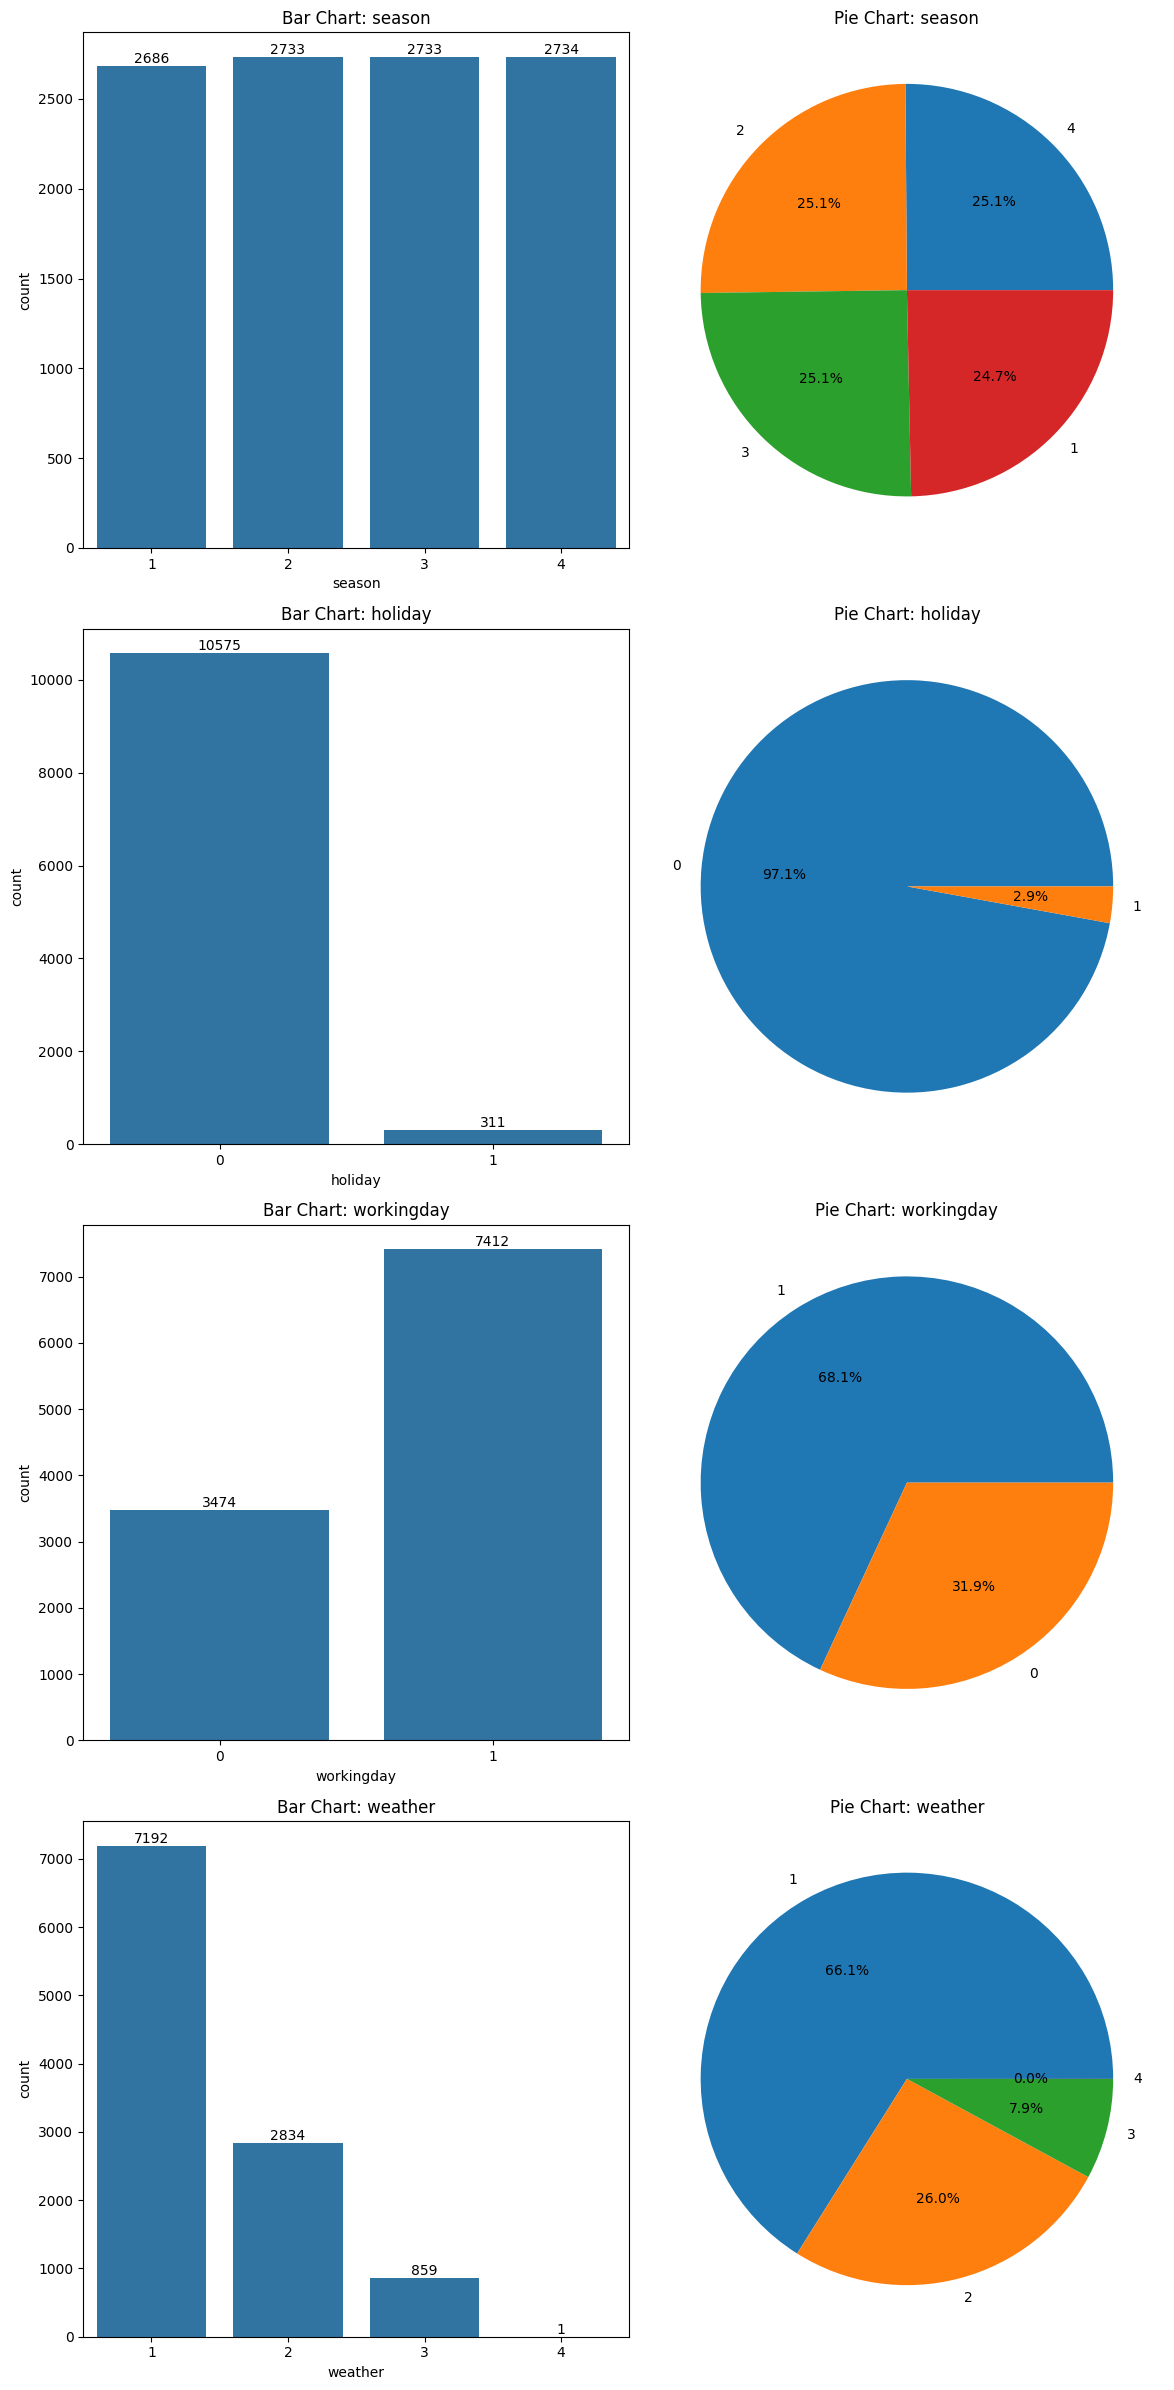

In [24]:
# Calling the above function
create_categorical_charts(yulu_df,cat_cols)

**Insight 1:**

In given hourly booking rides data,

*   **Season column:** It reveals that all four seasons are present in the data with an equal distribution of counts. This suggests there is no significant seasonal influence on the demand we're investigating. **In other words, seasonality is unlikely to be a key factor driving the demand patterns. However, further analysis is needed to confirm this hypothesis.**
* **Holiday column:** It indicates that 97.1% of bookings records for non-holiday days, while only 2.9% take place for holidays. **This suggests that holidays category might have a minimal impact on bookings. However, further analysis is needed to confirm this hypothesis.**
* **workingday column:** It indicates that 68.1% of bookings records for working days, while 31.9% take place for non-working days (weekends or holidays). **This suggests that working days category might have a slightly higher influence on bookings.However, further analysis is needed to confirm this hypothesis.**
* **weather column:**It indicates that 66.1% of bookings occur in weather condition 1, followed by 26% in weather condition 2 and 7.9% in weather condition 3. No bookings were recorded in weather condition 4. **weather can a substantial role in influencing demand. To validate this hypothesis, we will conduct further analysis.**







---



### **Numerical Columns:**

In [25]:
yulu_df.select_dtypes(exclude=['category','datetime']).describe().T

count        mean         std   min      25%      50%       75%  \
temp        10886.0   20.230860    7.791590  0.82  13.9400   20.500   26.2400   
atemp       10886.0   23.655084    8.474601  0.76  16.6650   24.240   31.0600   
humidity    10886.0   61.886460   19.245033  0.00  47.0000   62.000   77.0000   
windspeed   10886.0   12.799395    8.164537  0.00   7.0015   12.998   16.9979   
casual      10886.0   36.021955   49.960477  0.00   4.0000   17.000   49.0000   
registered  10886.0  155.552177  151.039033  0.00  36.0000  118.000  222.0000   
count       10886.0  191.574132  181.144454  1.00  42.0000  145.000  284.0000   

                 max  
temp         41.0000  
atemp        45.4550  
humidity    100.0000  
windspeed    56.9969  
casual      367.0000  
registered  886.0000  
count       977.0000



*   **Given data is hourly measured and data is spanned from Jan 01,2011 to Dec 19,2012.**
* **temp column (temperature):** The temperature ranged from 0.82 to 41.00, with an average of 20.23 and a median of 20.50, indicating a moderate temperature range with a slight left skew i.e. colder temperatures in the distribution.
* **atemp column (feeling temperature):** The temperature ranged from 0.76 to 45.46, with an average of 23.66 and a median of 24.24, indicating a moderate temperature range with a slight left skew i.e. colder temperatures in the distribution.
* **humidity column:** The humidity ranged from 0.00 to 100.00, with an average of 61.89,slightly below the median of 62.00,indicating a moderate temperature range with a slight left skew in the distribution. The standard deviation of 19.25% indicates a moderate level of variability in humidity, suggesting that there were some days with significantly higher or lower humidity levels.
* **windspeed column:** The windspeed ranged from 0.00 to 57.00, with an average of 12.80,slightly below the median of 12.99, suggesting a slight leftward skew in the distribution.The standard deviation of 8.16 indicates a moderate level of variability in windspeed, suggesting that there were some days with significantly higher or lower windspeed levels.
* **casual column(user count):** The number of casual users varied significantly, ranging from 0 to 367. The average number of casual users was 36.02, significantly greater than the median of 17.00, indicating a highly skewed distribution to the right.The standard deviation of 49.96 suggests a wide range of variability in the number of casual users, with some hours in a day experiencing much higher or lower numbers of casual riders."
* **registered column(user count):** The number of registered users varied significantly, ranging from 0 to 886. The average number of registered users was 155.55, significantly greater than the median of 118.00, indicating a highly skewed distribution to the right.The standard deviation of 151.03 suggests a wide range of variability in the number of registered users, with some hours in a day experiencing much higher or lower numbers of registered riders."

* **count column ( count of total rental bikes including both casual and registered):** The total number of rental bikes varied significantly, ranging from a minimum of 1 to a maximum of 977. The average number of rentals was 192, significantly higher than the median of 145, indicating a right-skewed distribution. The standard deviation of 181.44 suggests a wide range of variability in hourly rental counts, with some hours in day experiencing much higher or lower demand for bikes."




In [26]:
# a function - which create histogram and boxplot, qqplot for all numerical columns

def create_numerical_charts(df, numerical_cols):

  fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=3, figsize=(15,6 * len(numerical_cols)))

  for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col,bins=10, ax=axes[i, 0], kde= True, line_kws={"linewidth":4})
    axes[i, 0].set_title(f'Histogram of :{col} column')
    sns.boxplot(data=df, y=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of :{col} column')

    qqplot(df[col],line='s',ax=axes[i,2],label=col)
    axes[i,2].set_title(f"{col} Quantiles vs Theoritical Quantile")
    plt.xlabel("Theoritical Quantile")
    plt.ylabel(f"{col} Quantiles")
    # plt.legend()
    # set legend for qq plot using ax
    axes[i,2].legend()

    plt.tight_layout()
  plt.show()

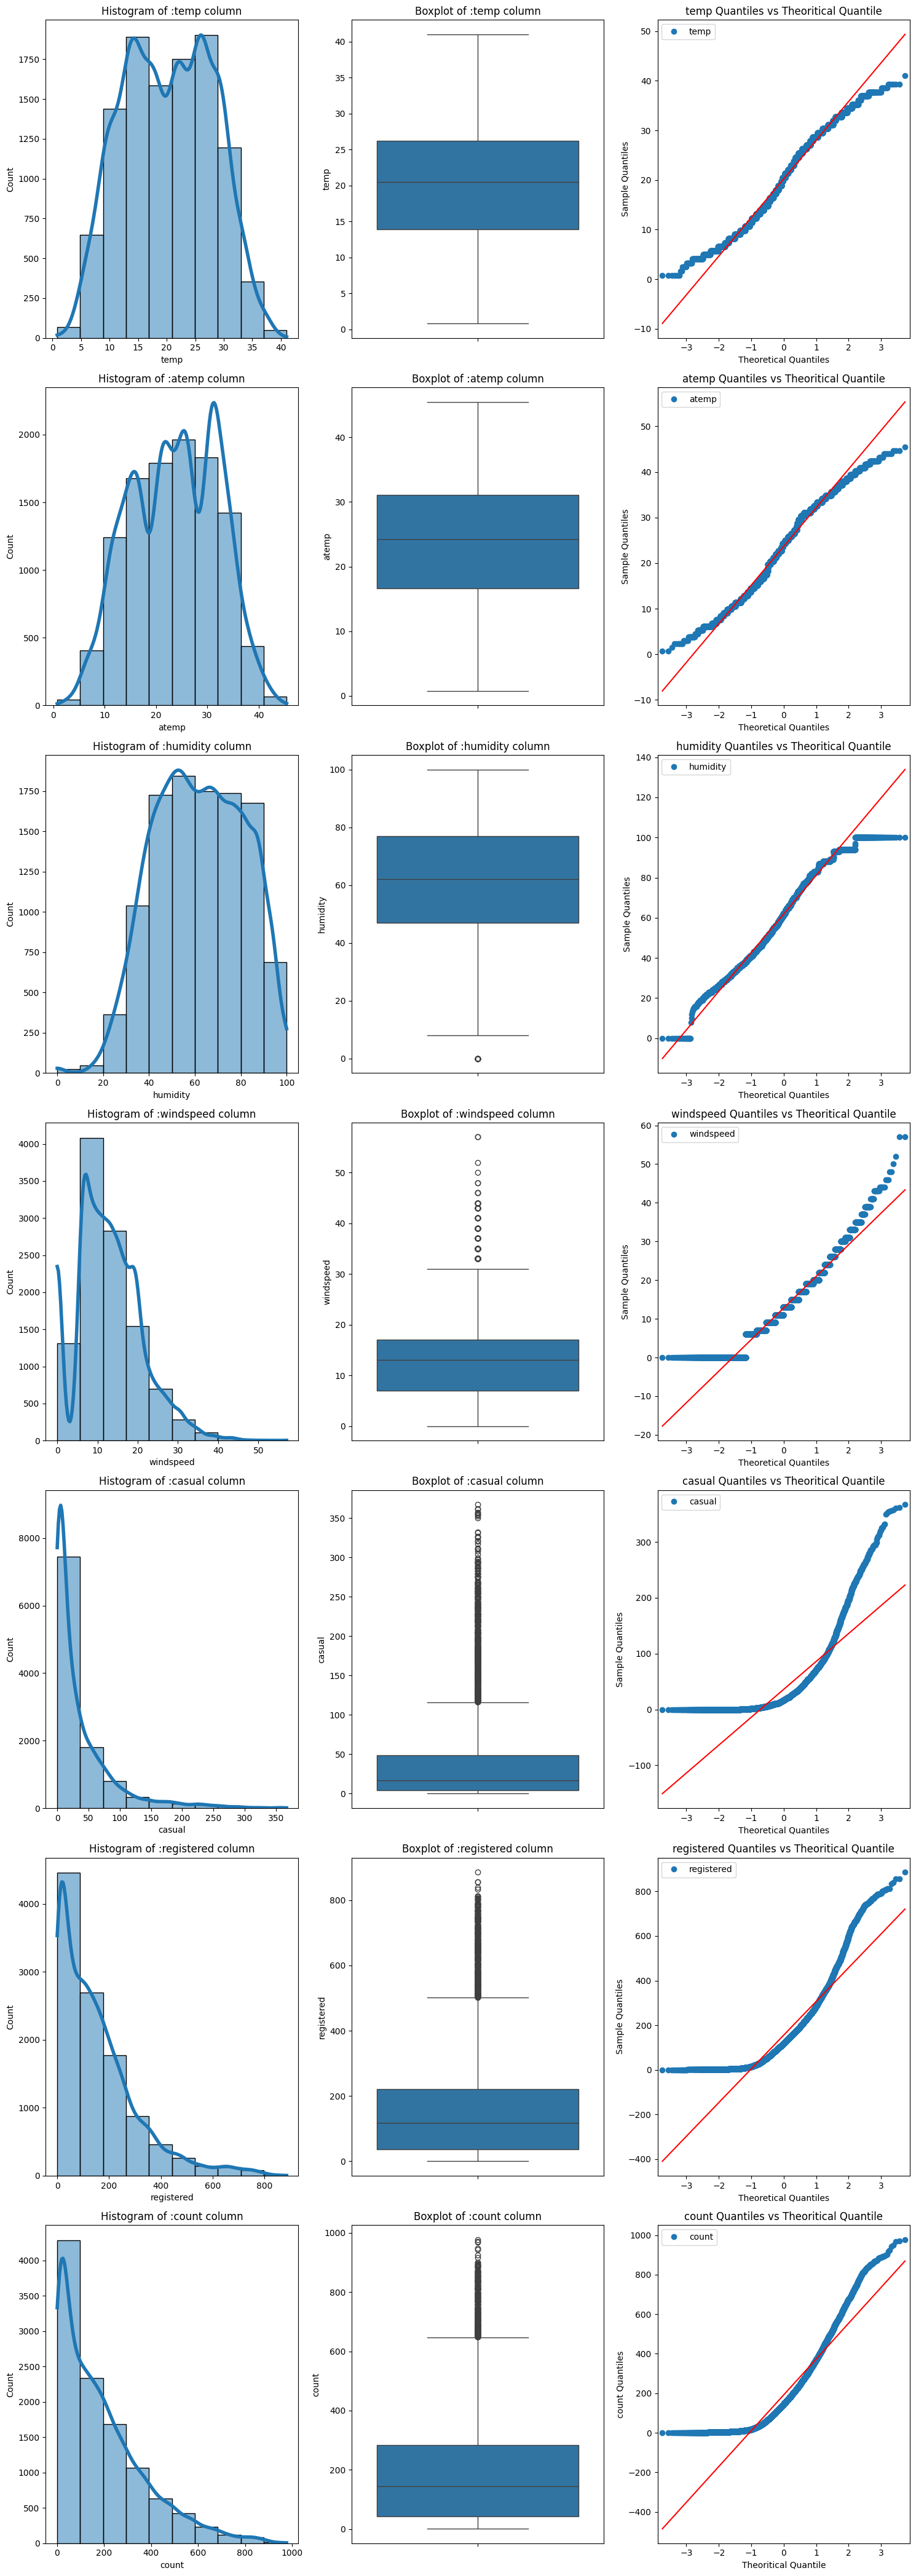

In [27]:
# calling function

num_cols = yulu_df.select_dtypes(exclude=['category','datetime']).columns.tolist()

create_numerical_charts(yulu_df,num_cols)

In [28]:

# function to perform shapiro test on numerical columns

from scipy.stats import shapiro

def check_shapiro_wilk(df, columns):

  shapiro_results = []
  for col in columns:
    statistic, p_value = shapiro(df[col])
    if p_value < 0.05:
      Normality_result = "Not a Normal Distribution"
    else:
      Normality_result = "Normal Distribution"
    # check for skewness
    skewness_value= df[col].skew()

    shapiro_results.append((col, statistic, p_value,Normality_result,skewness_value))

  return pd.DataFrame(shapiro_results, columns=['Column', 'Statistic', 'P-Value','Normality_result','Skewness_value'])



In [29]:
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [30]:
# calling function

# df.select_dtypes(include='number').columns.tolist()

results = check_shapiro_wilk(yulu_df,num_cols)

results

Column  Statistic       P-Value           Normality_result  \
0        temp   0.980405  4.441692e-36  Not a Normal Distribution   
1       atemp   0.981530  3.220898e-35  Not a Normal Distribution   
2    humidity   0.982259  1.222029e-34  Not a Normal Distribution   
3   windspeed   0.958734  7.590115e-48  Not a Normal Distribution   
4      casual   0.705635  3.544796e-87  Not a Normal Distribution   
5  registered   0.856278  1.972967e-71  Not a Normal Distribution   
6       count   0.878366  5.369838e-68  Not a Normal Distribution   

   Skewness_value  
0        0.003691  
1       -0.102560  
2       -0.086335  
3        0.588767  
4        2.495748  
5        1.524805  
6        1.242066

**Insights:**



*   **temp, atemp and humidity columns have an "approximate Normal Distribution". No outliers are present in them.**
*   **windspeed column is "moderately right skewed distributed" and has  outliers.**
*   **casual,registered and count columns are "heavily right skewed distributed" and have outliers.**



#### **Outlier detection and treatment:**

In [31]:
outlier_affected_columns = ['windspeed', 'casual', 'registered', 'count']

In [32]:
# function to check outlier percentage in each column

def check_outlier_percentage(df, columns):

  outlier_percentage_list = []

  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_percentage = round ((len(outliers) / len(df)) * 100,2)

    outlier_percentage_list.append((col, outlier_percentage))


  return pd.DataFrame(outlier_percentage_list, columns=['Column', 'Outlier_Percentage'])



In [33]:
# calling function

outlier_result = check_outlier_percentage(yulu_df,outlier_affected_columns)

outlier_result

Column  Outlier_Percentage
0   windspeed                2.09
1      casual                6.88
2  registered                3.89
3       count                2.76

##### **Outlier treatment:**

In [34]:
# create copy of yulu df for outlier treatment

new_yulu_df=yulu_df.copy()

In [35]:
# apply winsorization on windspeed, casual and registered columns and recalculate the count column

from scipy.stats.mstats import winsorize


new_yulu_df['casual'] = winsorize(new_yulu_df['casual'], limits=(0.07, 0.07))

new_yulu_df['registered'] = winsorize(new_yulu_df['registered'], limits=(0.05, 0.05))
new_yulu_df['windspeed'] = winsorize(new_yulu_df['windspeed'], limits=(0.05, 0.05))

# Recalculate 'count' based on the winsorized values
new_yulu_df['count'] = new_yulu_df['casual'] + new_yulu_df['registered']


In [36]:
new_yulu_df.head()

season holiday workingday weather  temp   atemp  humidity  windspeed  \
0      1       0          0       1  9.84  14.395        81        0.0   
1      1       0          0       1  9.02  13.635        80        0.0   
2      1       0          0       1  9.02  13.635        80        0.0   
3      1       0          0       1  9.84  14.395        75        0.0   
4      1       0          0       1  9.84  14.395        75        0.0   

   casual  registered  count  year month hour day       date  
0       3          13     16  2011     1    0   1 2011-01-01  
1       8          32     40  2011     1    1   1 2011-01-01  
2       5          27     32  2011     1    2   1 2011-01-01  
3       3          10     13  2011     1    3   1 2011-01-01  
4       0           4      4  2011     1    4   1 2011-01-01

In [37]:
# check outlier_percentage - calling function -- to validate outlier percentage after winsorization

new_outlier_result = check_outlier_percentage(new_yulu_df,outlier_affected_columns)

new_outlier_result

Column  Outlier_Percentage
0   windspeed                 0.0
1      casual                 0.0
2  registered                 0.0
3       count                 0.0

**--> Outliers treatment has been done successfully.Now, there is no more outliers.**



---



##### **Performing log transformation on each column:**

To check whether it will help us to convert the current distribution to Normal distribution.

* if converted to Normal Distribution then we will go with parametric Hypothesis test.
* if not conerted then we will go ahead with orginal values ( not log transformed values ) and check for Non-parametric Hypothesis test.

In [38]:
def log_transformation(df, columns):
    for col in columns:
      col_name = col + '_log'
      df[col_name] = np.log(df[col])

In [39]:
# calling function

log_transformation(new_yulu_df,outlier_affected_columns)



---



---



**After Log Transformation:**

In [40]:
outlier_affected_columns

['windspeed', 'casual', 'registered', 'count']

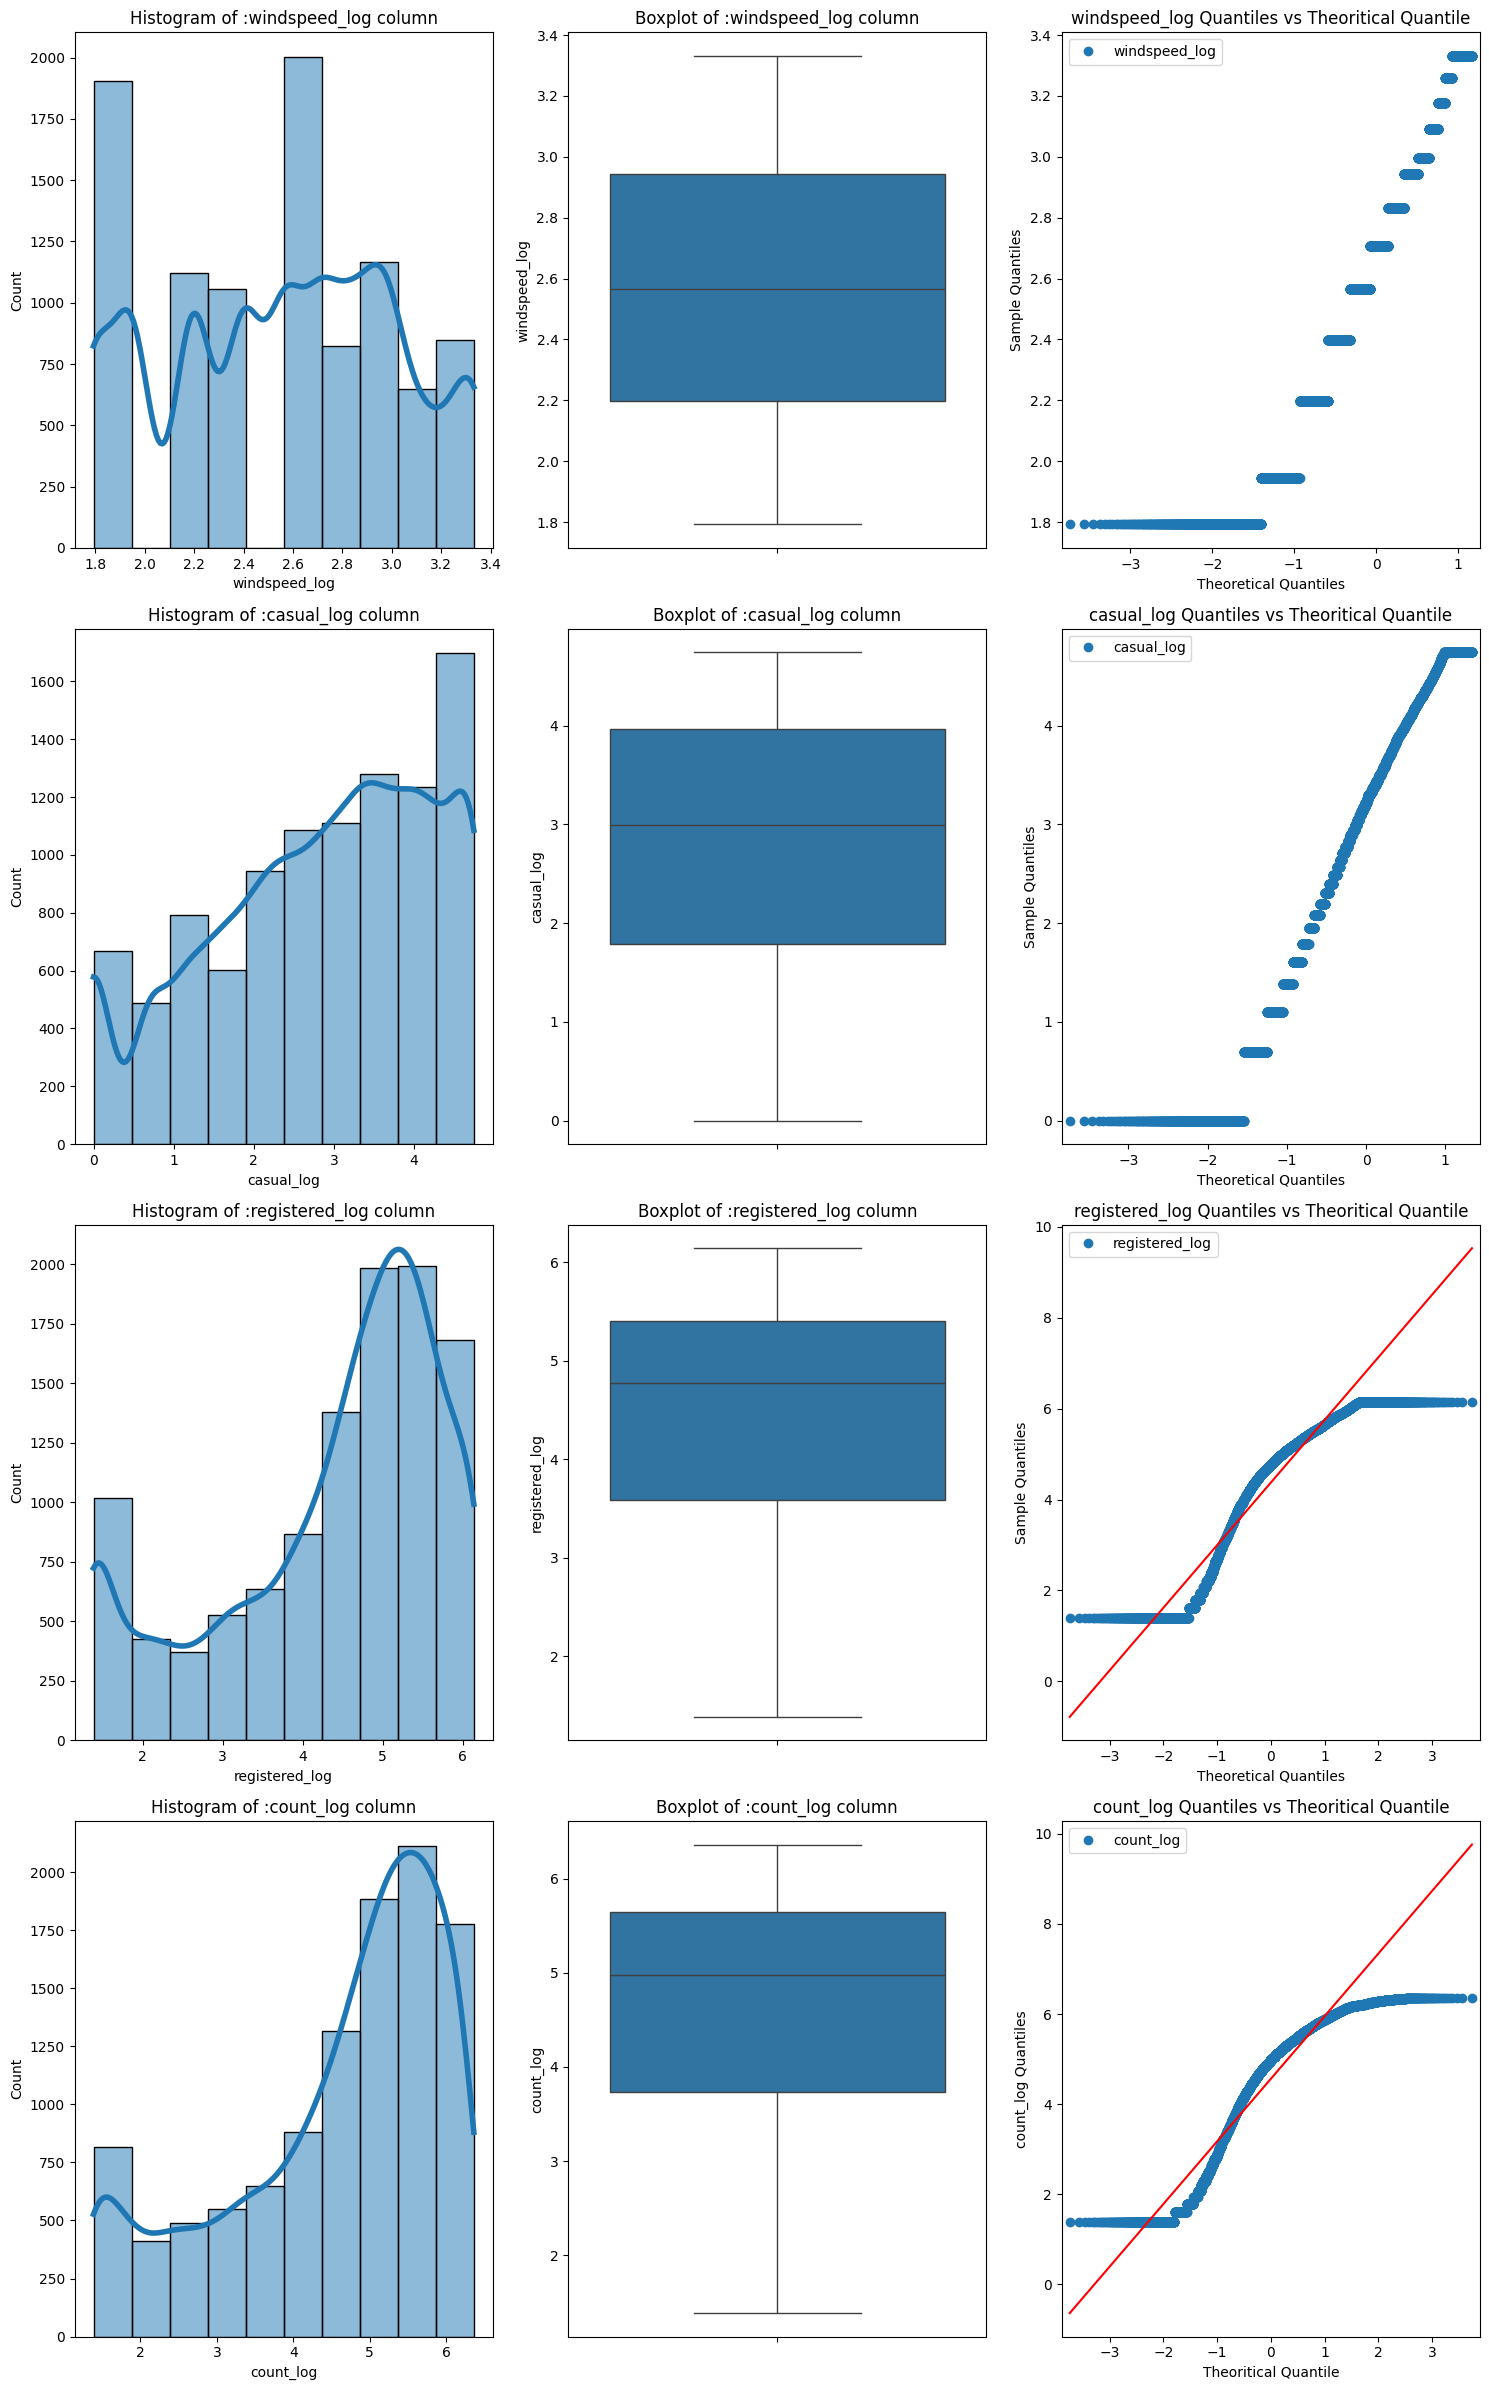

In [41]:
# call function of histogram and boxplot, qqplot chart -- to see the affect after log transformation

create_numerical_charts(new_yulu_df,['windspeed_log', 'casual_log', 'registered_log', 'count_log'])



---



---



**Before Log Transformation:**

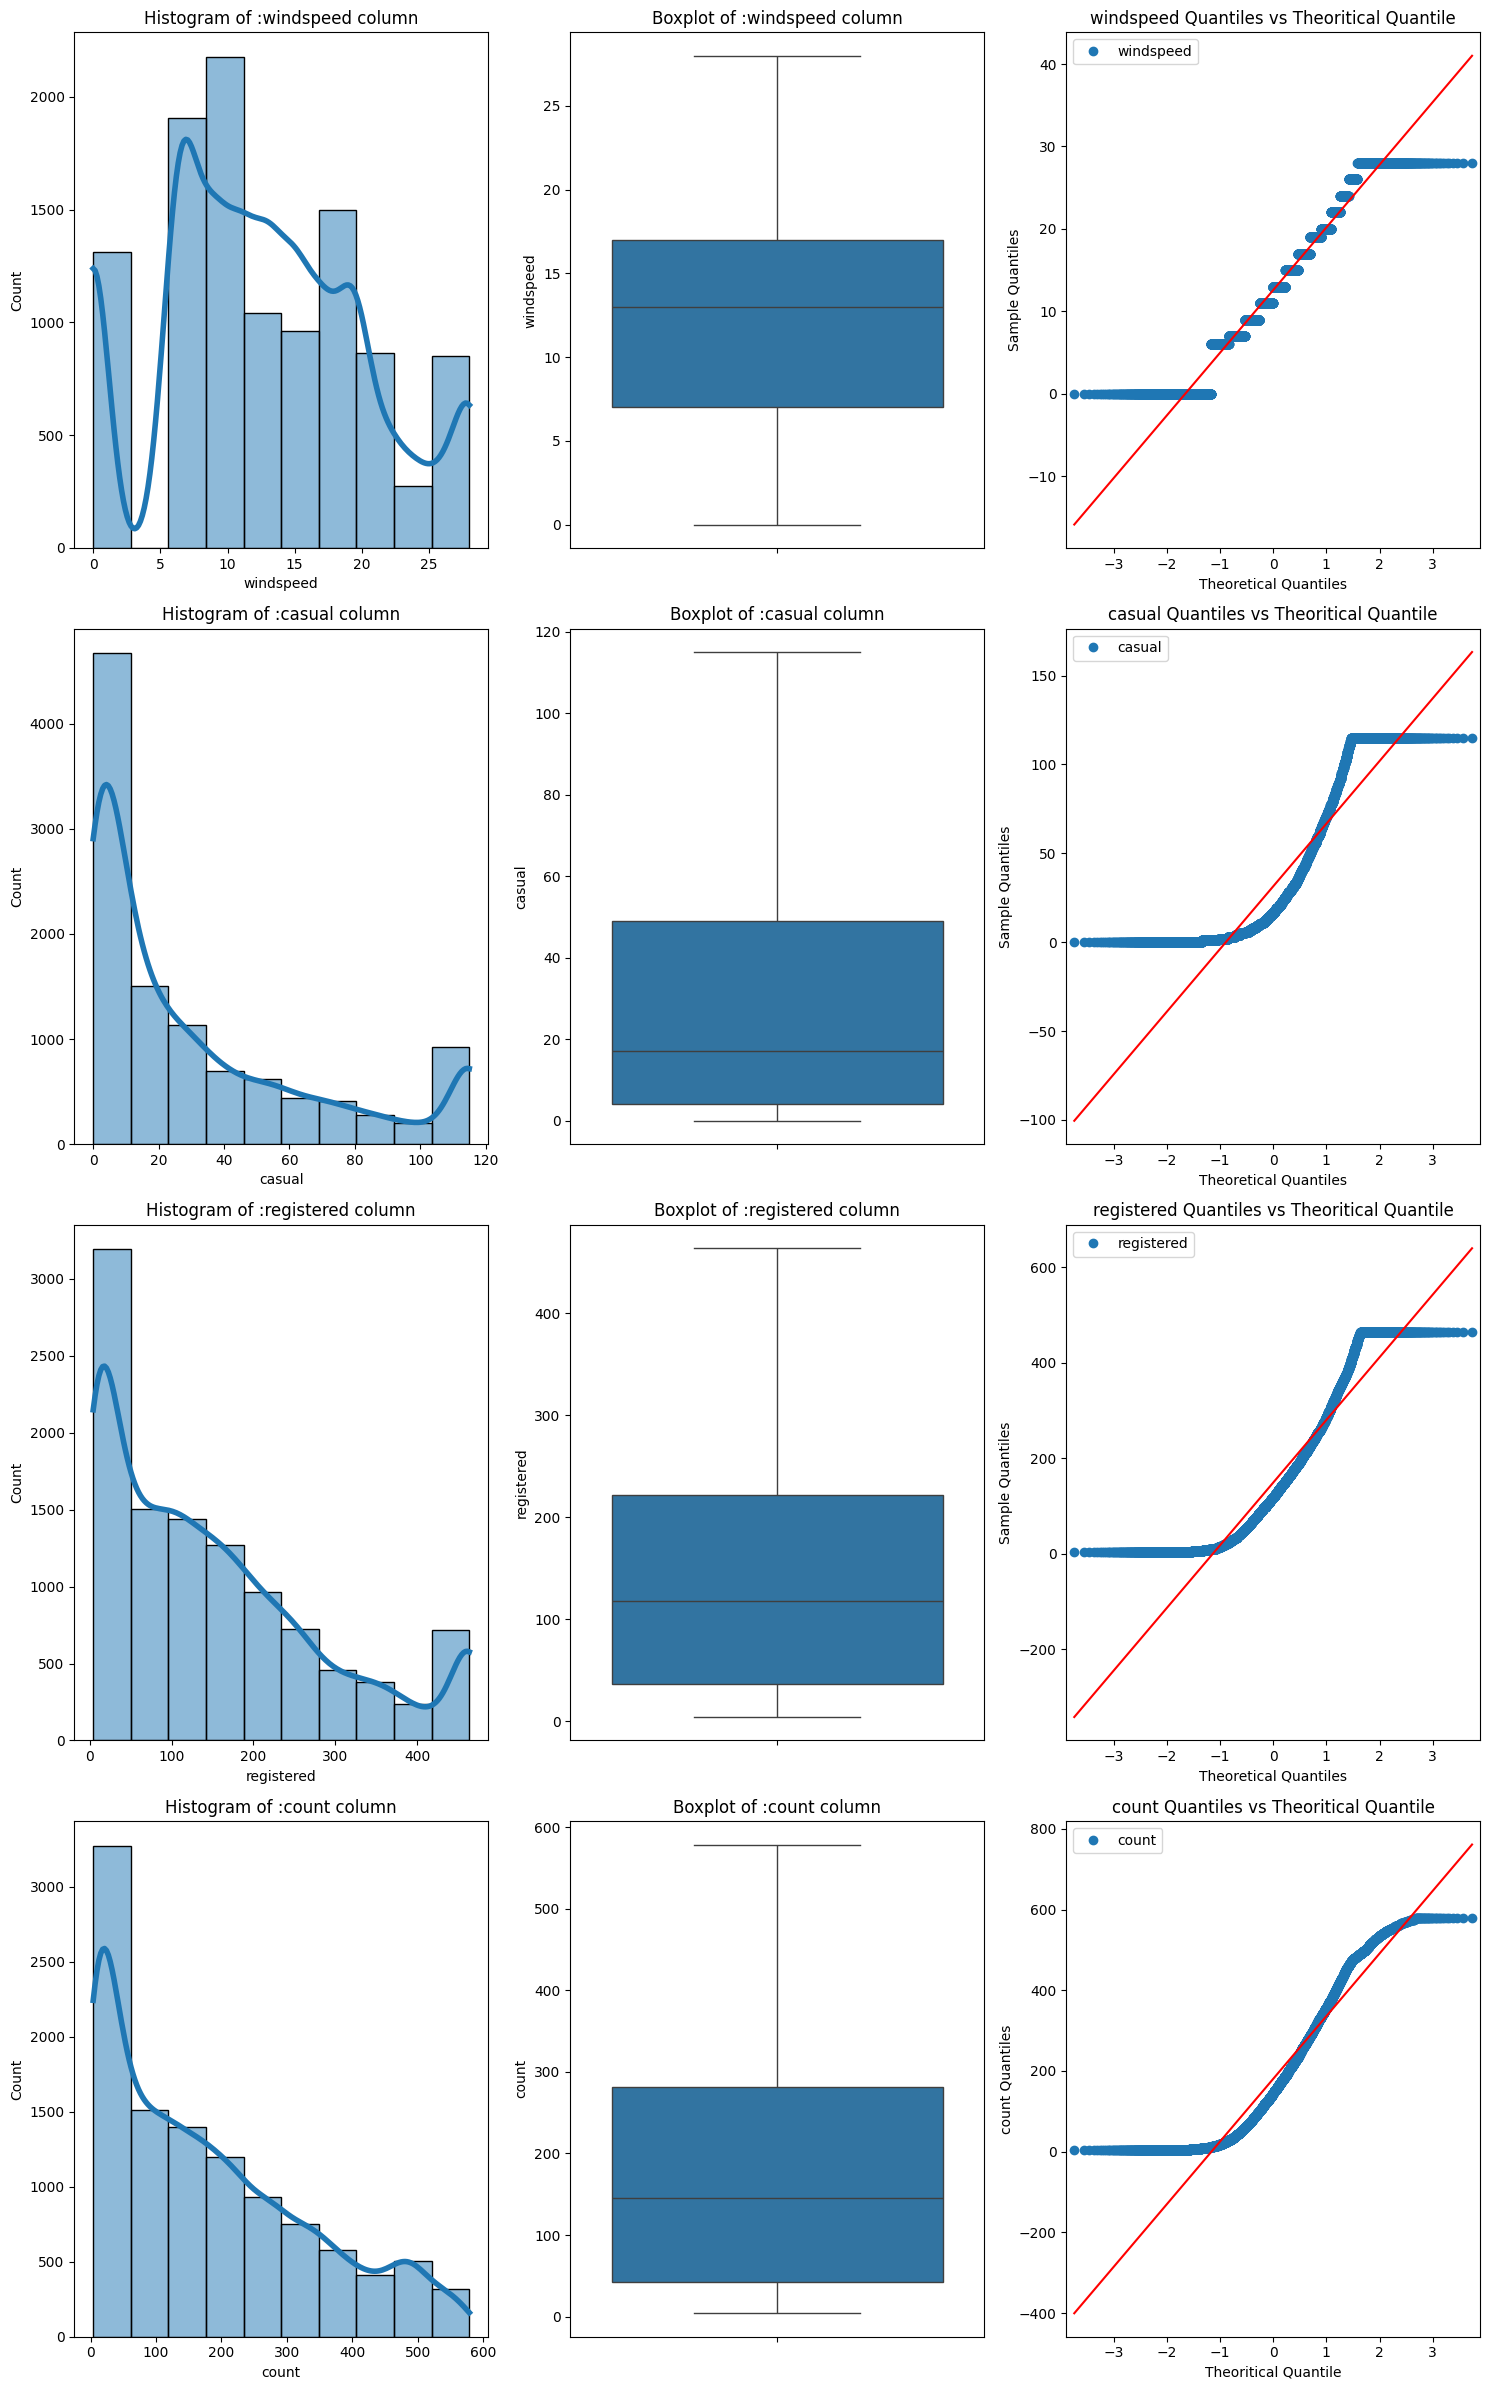

In [42]:
#  creating chart for Original (before log transformed columns) columns -- to compare the difference before and after log transformation

create_numerical_charts(new_yulu_df,outlier_affected_columns)

**--> As after Log transformation, Distribution not changed to Normal Distribution, So we are considering original columns value (without log transformation) for further analysis.**

## **Bivariate Analysis:**

In [43]:
new_yulu_df.head(2)

season holiday workingday weather  temp   atemp  humidity  windspeed  \
0      1       0          0       1  9.84  14.395        81        0.0   
1      1       0          0       1  9.02  13.635        80        0.0   

   casual  registered  count  year month hour day       date  windspeed_log  \
0       3          13     16  2011     1    0   1 2011-01-01            NaN   
1       8          32     40  2011     1    1   1 2011-01-01            NaN   

   casual_log  registered_log  count_log  
0    1.098612        2.564949   2.772589  
1    2.079442        3.465736   3.688879

In [44]:
new_yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   season          10886 non-null  category      
 1   holiday         10886 non-null  category      
 2   workingday      10886 non-null  category      
 3   weather         10886 non-null  category      
 4   temp            10886 non-null  float64       
 5   atemp           10886 non-null  float64       
 6   humidity        10886 non-null  int64         
 7   windspeed       10886 non-null  float64       
 8   casual          10886 non-null  int64         
 9   registered      10886 non-null  int64         
 10  count           10886 non-null  int64         
 11  year            10886 non-null  category      
 12  month           10886 non-null  category      
 13  hour            10886 non-null  category      
 14  day             10886 non-null  category      
 15  da

In [45]:
# dropping unnecessary columns

final_yulu_df = new_yulu_df.drop(['windspeed_log', 'casual_log', 'registered_log', 'count_log'],axis=1)

final_yulu_df

season holiday workingday weather   temp   atemp  humidity  windspeed  \
0          1       0          0       1   9.84  14.395        81     0.0000   
1          1       0          0       1   9.02  13.635        80     0.0000   
2          1       0          0       1   9.02  13.635        80     0.0000   
3          1       0          0       1   9.84  14.395        75     0.0000   
4          1       0          0       1   9.84  14.395        75     0.0000   
...      ...     ...        ...     ...    ...     ...       ...        ...   
10881      4       0          1       1  15.58  19.695        50    26.0027   
10882      4       0          1       1  14.76  17.425        57    15.0013   
10883      4       0          1       1  13.94  15.910        61    15.0013   
10884      4       0          1       1  13.94  17.425        61     6.0032   
10885      4       0          1       1  13.12  16.665        66     8.9981   

       casual  registered  count  year month hour day       date  
0           3          13     16  2011     1    0   1 2011-01-01  
1           8          32     40  2011     1    1   1 2011-01-01  
2           5          27     32  2011     1    2   1 2011-01-01  
3           3          10     13  2011     1    3   1 2011-01-01  
4           0           4      4  2011     1    4   1 2011-01-01  
...       ...         ...    ...   ...   ...  ...  ..        ...  
10881       7         329    336  2012    12   19  19 2012-12-19  
10882      10         231    241  2012    12   20  19 2012-12-19  
10883       4         164    168  2012    12   21  19 2012-12-19  
10884      12         117    129  2012    12   22  19 2012-12-19  
10885       4          84     88  2012    12   23  19 2012-12-19  

[10886 rows x 16 columns]

In [46]:
final_yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      10886 non-null  category      
 1   holiday     10886 non-null  category      
 2   workingday  10886 non-null  category      
 3   weather     10886 non-null  category      
 4   temp        10886 non-null  float64       
 5   atemp       10886 non-null  float64       
 6   humidity    10886 non-null  int64         
 7   windspeed   10886 non-null  float64       
 8   casual      10886 non-null  int64         
 9   registered  10886 non-null  int64         
 10  count       10886 non-null  int64         
 11  year        10886 non-null  category      
 12  month       10886 non-null  category      
 13  hour        10886 non-null  category      
 14  day         10886 non-null  category      
 15  date        10886 non-null  datetime64[ns]
dtypes: category(8), dateti

### **Numerical vs Numerical:**

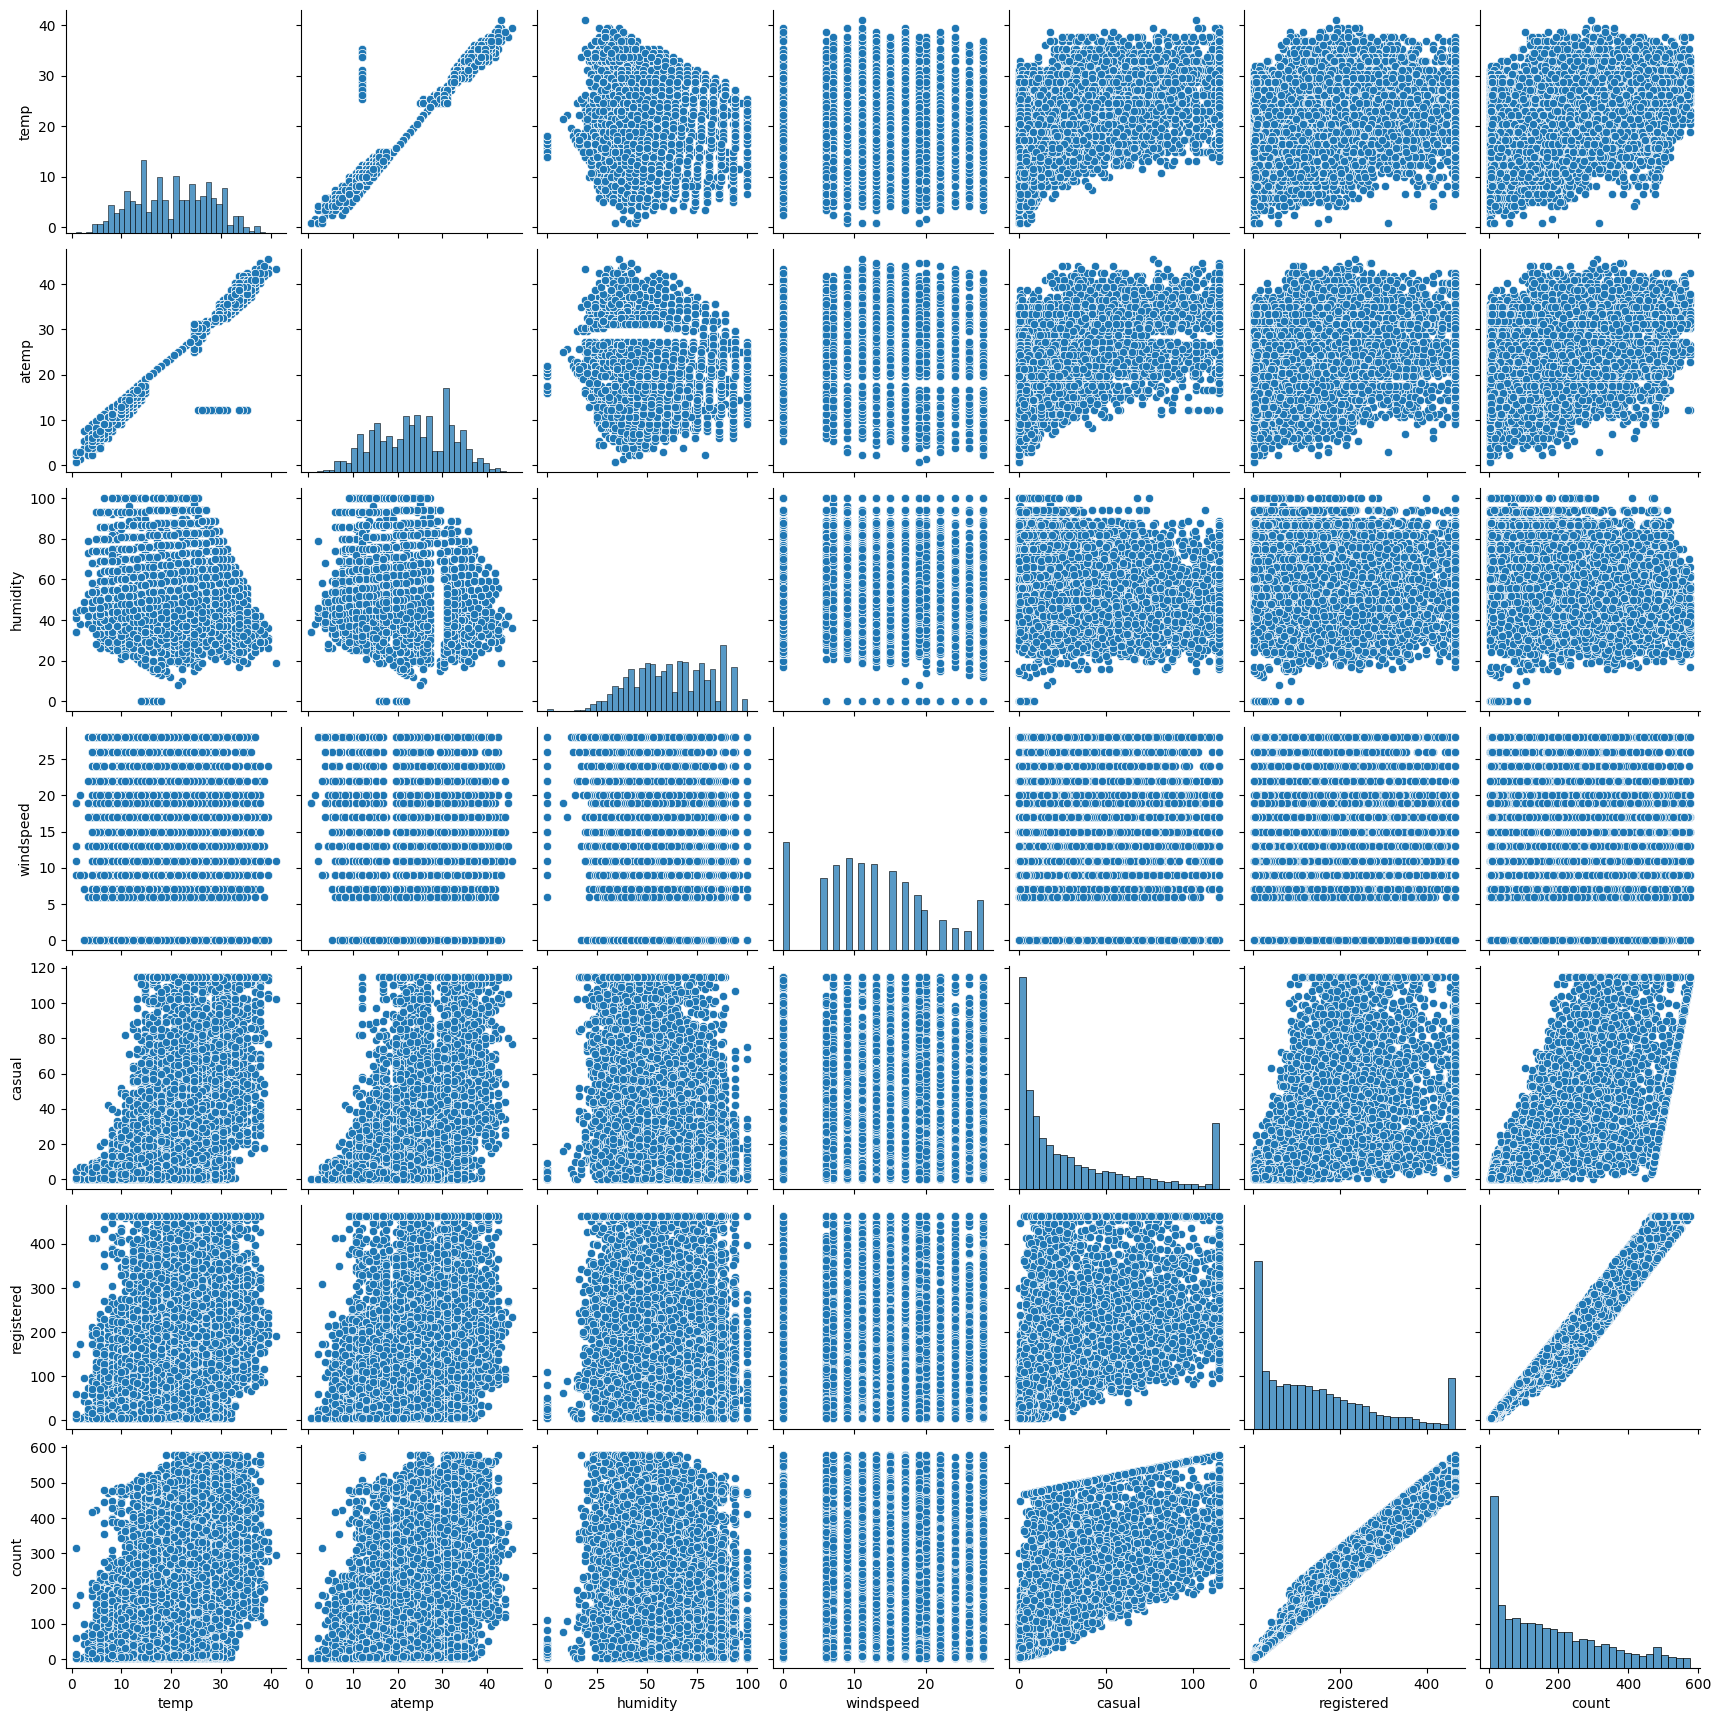

In [47]:
# pairplot

sns.pairplot(final_yulu_df)
plt.show()

In [48]:
# take sample of 1000 rows from final yulu df with constant seed every time


np.random.seed(42)

sample_df = final_yulu_df.sample(500)

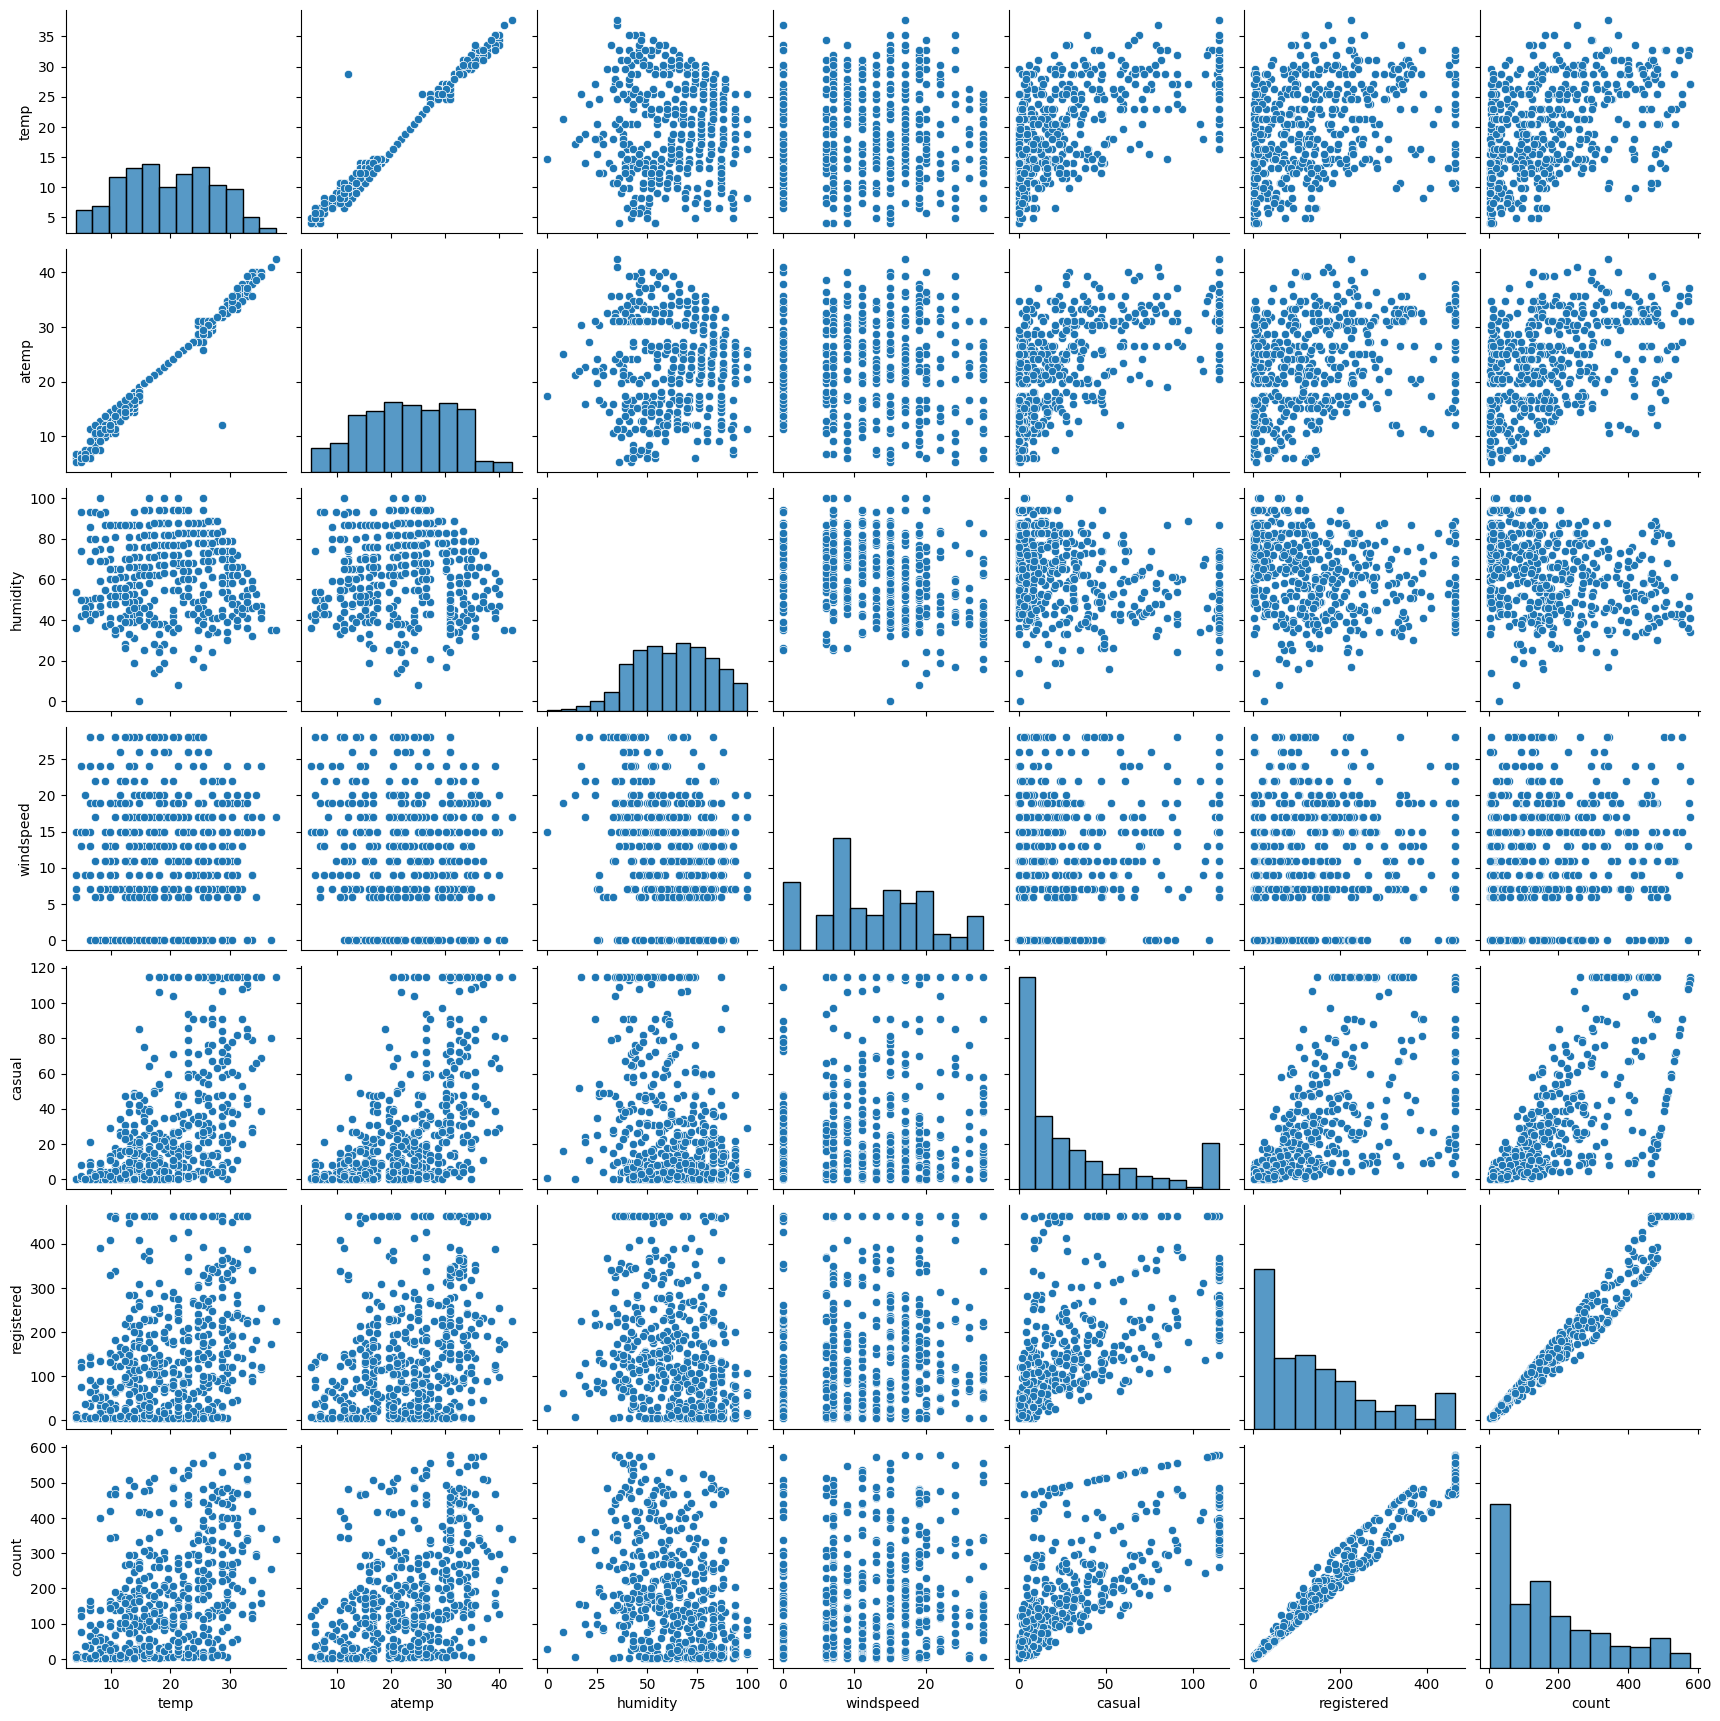

In [49]:
sns.pairplot(sample_df)
plt.show()

#### **Correlation Analysis:**

In [50]:
corr_matrix = final_yulu_df.select_dtypes(exclude=['category','datetime']).corr(method='spearman')

corr_matrix

temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.987128 -0.046854  -0.005395  0.572820    0.351079   
atemp       0.987128  1.000000 -0.042028  -0.036191  0.571276    0.349467   
humidity   -0.046854 -0.042028  1.000000  -0.324492 -0.377725   -0.333293   
windspeed  -0.005395 -0.036191 -0.324492   1.000000  0.135366    0.131891   
casual      0.572820  0.571276 -0.377725   0.135366  1.000000    0.775094   
registered  0.351079  0.349467 -0.333293   0.131891  0.775094    1.000000   
count       0.405921  0.404282 -0.352377   0.136844  0.843181    0.990912   

               count  
temp        0.405921  
atemp       0.404282  
humidity   -0.352377  
windspeed   0.136844  
casual      0.843181  
registered  0.990912  
count       1.000000

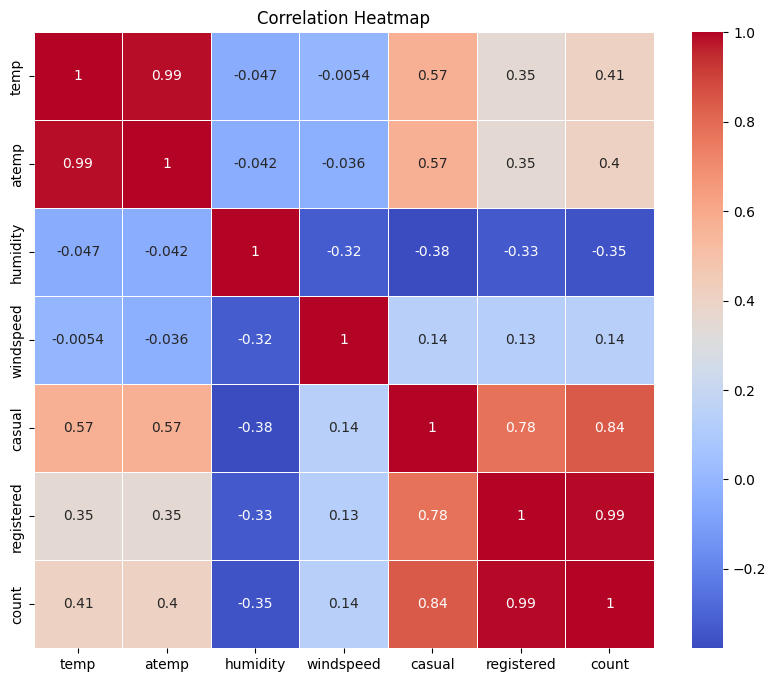

In [51]:
# heat map

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### **conclusion:**

**Correlation Insights:**



*   Positive correlation:
  * count and registered column ( value: 0.99 )
  * temp and atemp column ( value: 0.99 )
  * count and casual column ( value: 0.84 )
  * registered and casual column (value: 0.78)
  * casual and temp/atemp column (value:0.57)
  * registered and temp/atemp column (value:0.35)
  * count and temp column ( value: 0.41 )
  * count and atemp column ( value: 0.40 )

*   Negative correlation:
  * humidity and casual column ( value: -0.38 )
  * humidity and count column ( value: -0.35 )
  * humidity and registered column ( value: -0.33 )
  * humidity and windspeed column ( value: -0.32 )



### **Categorical vs Numerical:**

In [52]:
cat_cols

['season', 'holiday', 'workingday', 'weather']

In [53]:
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

**--> As per problemstatement , we want to understand the factors which are affecting the Demand of Count column. Since Our target Numerical column is "Count" column.**

#### **Season vs Count [ Count by Season ]:**

##### **Groups Statistics:**

In [54]:
final_yulu_df.groupby('season')['count'].agg(['mean','median','std','min','max']).T

season           1           2           3           4
mean    113.754281  200.401756  217.691182  188.487564
median   78.000000  172.000000  195.000000  161.000000
std     115.493603  162.318669  164.379121  152.689377
min       4.000000    4.000000    4.000000    4.000000
max     579.000000  579.000000  579.000000  579.000000

##### **Groups Visualization:**

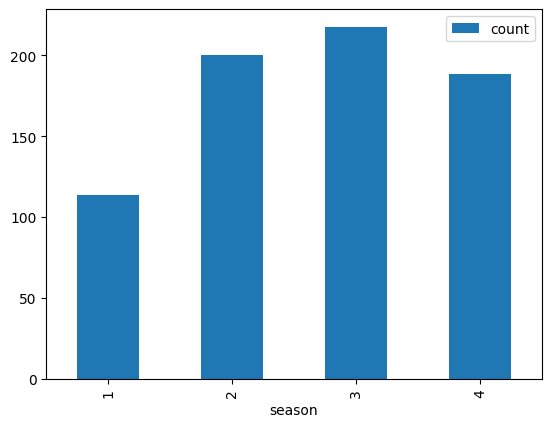

In [55]:
# Bar chart -- showing mean for each season

final_yulu_df[['season','count']].groupby('season').mean().plot(kind='bar')
plt.show()

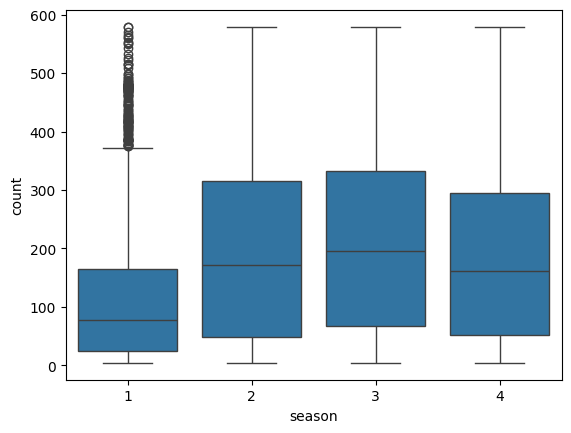

In [56]:
# boxplot for each season group

sns.boxplot(x='season',y='count',data=final_yulu_df)
plt.show()

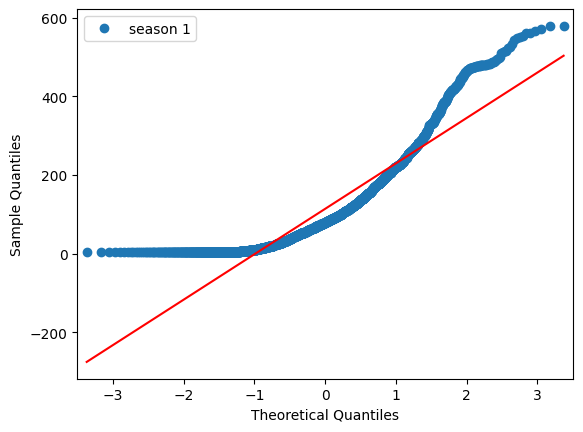

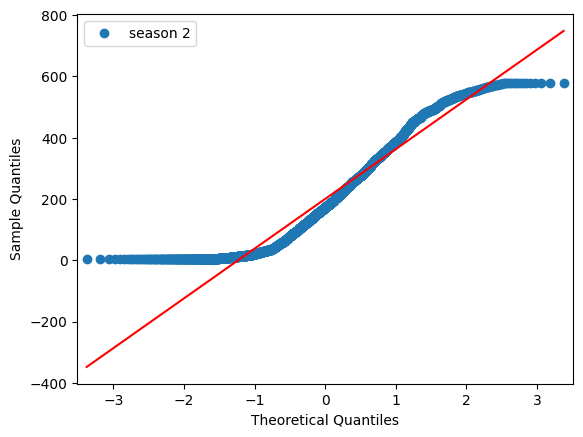

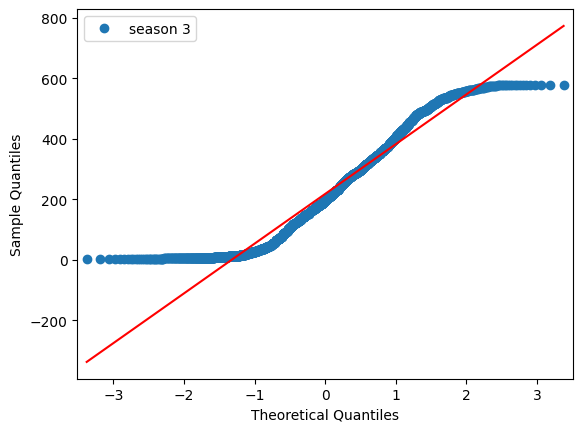

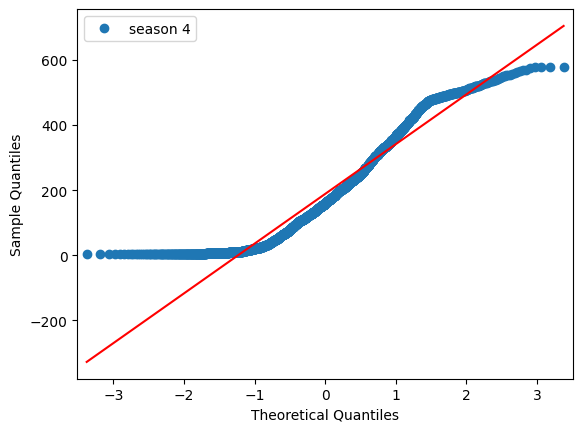

In [57]:
# qqplot for each season's count

for season in final_yulu_df['season'].unique():
  season_data = final_yulu_df[final_yulu_df['season'] == season]['count']
  qqplot(season_data,line='s',label="season "+str(season))
  plt.legend()
  plt.show()

In [58]:
# shapiro wilk test for each season's count

shapiro_result=[]

for season in final_yulu_df['season'].unique():
  season_data = final_yulu_df[final_yulu_df['season'] == season]['count']
  statistic, p_value = shapiro(season_data)
  if p_value < 0.05:
    Normality_result = "Not a Normal Distribution"
  else:
    Normality_result = "Normal Distribution"

  shapiro_result.append((season, statistic, p_value,Normality_result))

shapiro_result_df = pd.DataFrame(shapiro_result, columns=['Season', 'Statistic', 'P-Value','Normality_result'])

shapiro_result_df


Season  Statistic       P-Value           Normality_result
0       1   0.838411  4.658598e-46  Not a Normal Distribution
1       2   0.923165  2.912831e-35  Not a Normal Distribution
2       3   0.937785  2.129391e-32  Not a Normal Distribution
3       4   0.922185  1.918561e-35  Not a Normal Distribution

##### **Groups Hypothesis Testing:**

**The Kruskal-Wallis test:**

**We could see that distribution of count across each season groups is not a Normal Distribution. Since we are using "The Kruskal-Wallis test" to check the difference in the distribution/median of the count across the season groups.**

---
Hypothesis:


*   **Null Hypothesis:** There is no significant difference in the distribution/median of the count across the season groups.
*   **Alternate Hypothesis:** There is a significant difference in the distribution/median of the count across at least one of the season groups.



In [59]:
# kruskal-wallis test -- for each season groups' count--

from scipy.stats import kruskal

# Extract the count values for each season group

season_1 = final_yulu_df[final_yulu_df['season'] == 1]['count']
season_2 = final_yulu_df[final_yulu_df['season'] == 2]['count']
season_3 = final_yulu_df[final_yulu_df['season'] == 3]['count']
season_4 = final_yulu_df[final_yulu_df['season'] == 4]['count']

# performing test
statistic, p_value = kruskal(season_1,season_2,season_3,season_4)

print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

# conclusion

if p_value < 0.05:
  print("There is a significant difference in the distribution/median of the count across at least one of the season groups.")
else:
  print("There is no significant difference in the distribution/median of the count across the season groups.")



Kruskal-Wallis Statistic: 694.6727942729907
P-value: 3.000360231576398e-150
There is a significant difference in the distribution/median of the count across at least one of the season groups.




---





*   **Mann-Whitney U test for each pair of seasons:**

--> To determine which specific seasons differ significantly, conduct pairwise comparisons using the Mann-Whitney U test.
**This will help identify which seasons have significantly different demand levels.**



In [60]:

import scipy.stats as stats

seasons = [1, 2, 3, 4]
df = final_yulu_df
mannwhitneyu_results = []

# Perform Mann-Whitney U test for each pair of seasons
# Assuming your DataFrame is named 'df'
# Perform pairwise comparisons using Mann-Whitney U test
for i in range(len(seasons)):
    for j in range(i+1, len(seasons)):
        season1 = df[df['season'] == seasons[i]]['count']
        season2 = df[df['season'] == seasons[j]]['count']
        u_statistic, p_value = stats.mannwhitneyu(season1, season2)

        # conclusion for each season1 and season2
        if p_value < 0.05:
          # result = f"There is a significant difference in the distribution/median of the count between the season groups {season1} and {season2}."
          result = f"significant difference in the median of the count between the season groups {seasons[i]} and {seasons[j]}."
        else:
          result = f"NO significant difference in the median of the count between the season groups {season1} and {season2}."

        mannwhitneyu_results.append((seasons[i], seasons[j], u_statistic, p_value,result))

# Create a DataFrame to store the results
mannwhitneyu_results_df = pd.DataFrame(mannwhitneyu_results, columns=['Season1', 'Season2', 'U-statistic', 'p-value','result'])

mannwhitneyu_results_df

Season1  Season2  U-statistic        p-value  \
0        1        2    2522873.5   2.188654e-88   
1        1        3    2276691.0  1.917907e-129   
2        1        4    2597131.0   1.056709e-77   
3        2        3    3496748.0   4.538326e-05   
4        2        4    3867508.5   2.421964e-02   
5        3        4    4115335.0   7.984190e-11   

                                              result  
0  significant difference in the median of the co...  
1  significant difference in the median of the co...  
2  significant difference in the median of the co...  
3  significant difference in the median of the co...  
4  significant difference in the median of the co...  
5  significant difference in the median of the co...

##### **conclusion:**

This suggests that **seasonality plays a significant role in the demand for Yulu's electric cycles.**

#### **Holiday vs Count [ Count by Holiday ]:**

In [61]:
final_yulu_df['holiday'].unique()

[0, 1]
Categories (2, int64): [0, 1]

##### **Groups Statistics:**

In [62]:
final_yulu_df.groupby('holiday')['count'].agg(['mean','median','std','min','max']).T

holiday           0           1
mean     180.516407  175.421222
median   145.000000  133.000000
std      155.356933  151.512651
min        4.000000    4.000000
max      579.000000  575.000000

##### **Groups Visualization:**

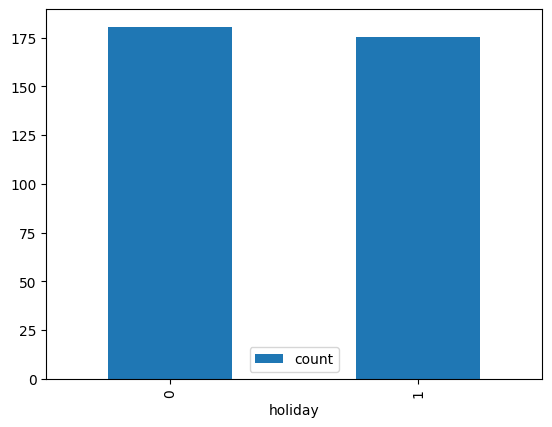

In [63]:
# Bar chart -- showing mean for each season

final_yulu_df[['holiday','count']].groupby('holiday').mean().plot(kind='bar')
plt.show()

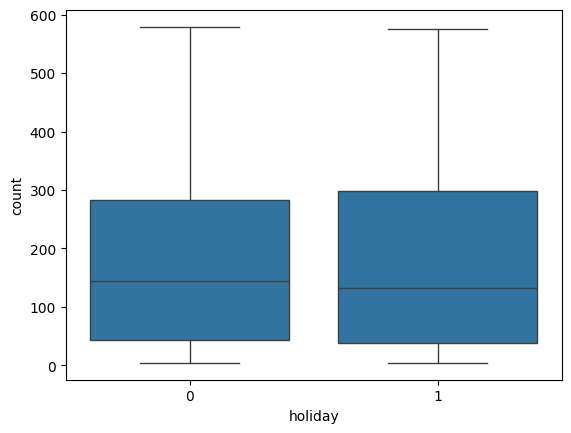

In [64]:
# boxplot for each season group

sns.boxplot(x='holiday',y='count',data=final_yulu_df)
plt.show()

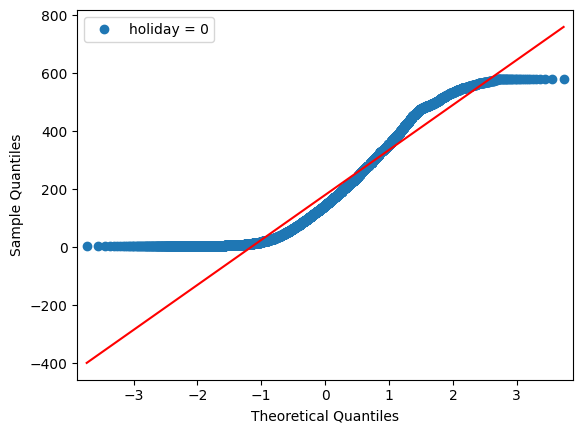

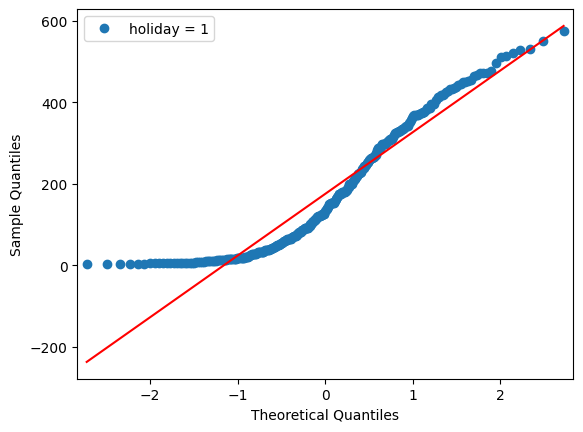

In [65]:
# qqplot for each season's count

for holiday in final_yulu_df['holiday'].unique():
  holiday_data = final_yulu_df[final_yulu_df['holiday'] == holiday]['count']
  qqplot(holiday_data,line='s',label="holiday = "+str(holiday))
  plt.legend()
  plt.show()

In [66]:
# shapiro wilk test for each season's count

shapiro_result=[]

for holiday in final_yulu_df['holiday'].unique():
  holiday_data = final_yulu_df[final_yulu_df['holiday'] == holiday]['count']
  statistic, p_value = shapiro(holiday_data)
  if p_value < 0.05:
    Normality_result = "Not a Normal Distribution"
  else:
    Normality_result = "Normal Distribution"

  shapiro_result.append((holiday, statistic, p_value,Normality_result))

shapiro_result_df = pd.DataFrame(shapiro_result, columns=['Holiday', 'Statistic', 'P-Value','Normality_result'])

shapiro_result_df


Holiday  Statistic       P-Value           Normality_result
0        0   0.907807  6.584775e-62  Not a Normal Distribution
1        1   0.903544  3.408637e-13  Not a Normal Distribution

##### **Groups Hypothesis Testing:**

**The Mann-Whitney U test:**

**We could see that distribution of count across each Holiday groups is not a Normal Distribution. Since we are using "The Mann-Whitney U test" to check the difference in the distribution/median of the count across the Holiday groups.**

---
Hypothesis:


*   **Null Hypothesis:** There is no significant difference in the distribution/median of the count between the Holiday group 0 and 1.
*   **Alternate Hypothesis:** There is a significant difference in the distribution/median of the count between the Holiday group 0 and 1.



In [67]:
# Perform Mann-Whitney U test for each holiday

df = final_yulu_df

# Assuming your DataFrame is named 'df'
# Perform pairwise comparisons using Mann-Whitney U test
holiday0 = df[df['holiday'] == 0]['count']
holiday1 = df[df['holiday'] == 1]['count']
u_statistic, p_value = stats.mannwhitneyu(holiday0, holiday1)

 # conclusion for each season1 and season2
if p_value < 0.05:
  result = f"significant difference in the median of the count between the holiday groups 0 and 1."
else:
  result = f"NO significant difference in the median of the count between the holiday groups 0 and 1."

print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")
print(result)

U-statistic: 1665966.5
P-value: 0.6931428541637652
NO significant difference in the median of the count between the holiday groups 0 and 1.


##### **conclusion:**

This suggests that **Holiday plays NOT a significant role in the demand for Yulu's electric cycles.**

#### **Workingday Vs Count [ Count by Workingday ]:**

In [68]:
final_yulu_df['workingday'].unique()

[0, 1]
Categories (2, int64): [0, 1]

--> **workingday: if day is neither weekend nor holiday is 1, otherwise is 0.**

In [69]:
input = 'workingday'
target = 'count'

##### **Groups Statistics:**

In [70]:
final_yulu_df.groupby(input)[target].agg(['mean','median','std','min','max']).T

workingday           0           1
mean        174.366149  183.185240
median      128.000000  151.000000
std         147.783306  158.551486
min           4.000000    4.000000
max         579.000000  579.000000

##### **Groups Visualization:**

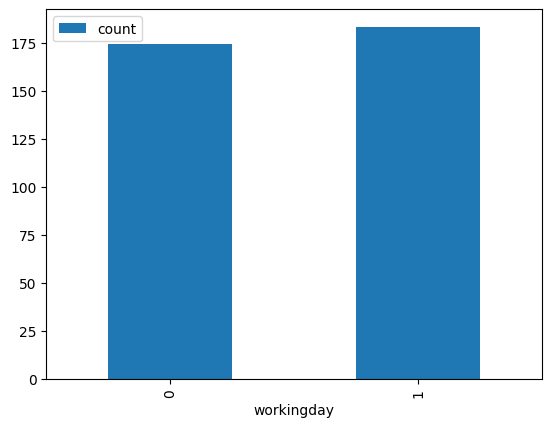

In [71]:
# Bar chart -- showing mean for each season

final_yulu_df[[input,target]].groupby(input).mean().plot(kind='bar')
plt.show()

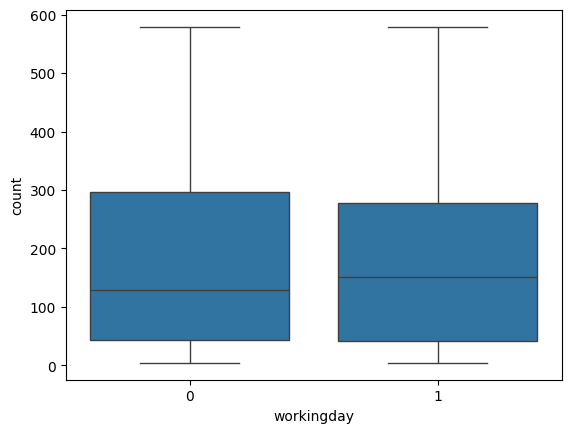

In [72]:
# boxplot for each season group

sns.boxplot(x=input,y=target,data=final_yulu_df)
plt.show()

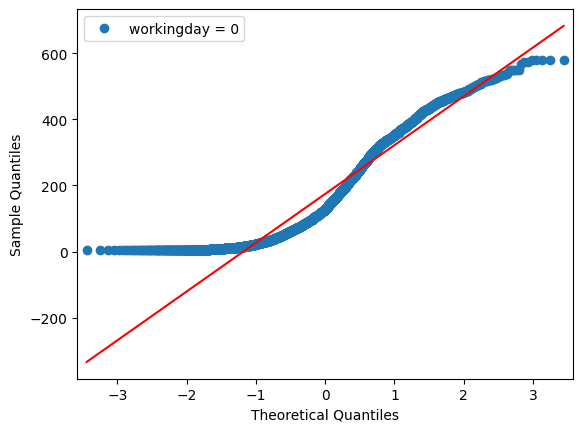

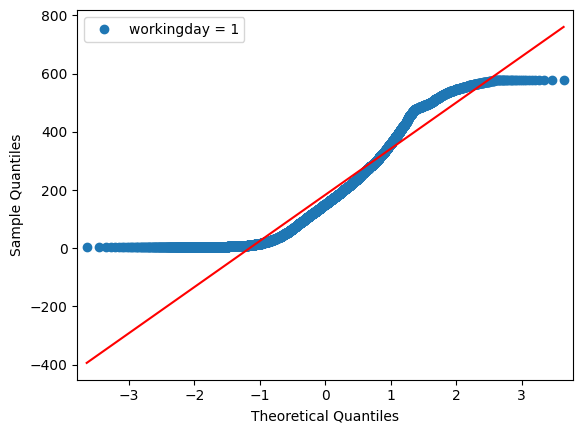

In [73]:
# qqplot for each season's count

for x in final_yulu_df[input].unique():
  data = final_yulu_df[final_yulu_df[input] == x][target]
  qqplot(data,line='s',label=input+" = "+str(x))
  plt.legend()
  plt.show()

In [74]:
# shapiro wilk test for each season's count

shapiro_result=[]

for x in final_yulu_df[input].unique():
  data = final_yulu_df[final_yulu_df[input] == x][target]
  statistic, p_value = shapiro(data)
  if p_value < 0.05:
    Normality_result = "Not a Normal Distribution"
  else:
    Normality_result = "Normal Distribution"

  shapiro_result.append((x, statistic, p_value,Normality_result))

shapiro_result_df = pd.DataFrame(shapiro_result, columns=[input, 'Statistic', 'P-Value','Normality_result'])

shapiro_result_df


workingday  Statistic       P-Value           Normality_result
0           0   0.904572  3.439498e-42  Not a Normal Distribution
1           1   0.904909  1.362177e-55  Not a Normal Distribution

##### **Groups Hypothesis Testing:**

**The Mann-Whitney U test:**

**We could see that distribution of count across each Workingday groups is not a Normal Distribution. Since we are using "The Mann-Whitney U test" to check the difference in the distribution/median of the count across the Workingday groups.**

---
Hypothesis:


*   **Null Hypothesis:** There is no significant difference in the distribution/median of the count between the Workingday group 0 and 1.
*   **Alternate Hypothesis:** There is a significant difference in the distribution/median of the count between the Workingday group 0 and 1.



In [75]:
# Perform Mann-Whitney U test for each workingday

df = final_yulu_df

# Assuming your DataFrame is named 'df'
# Perform pairwise comparisons using Mann-Whitney U test
workingday0 = df[df[input] == 0][target]
workingday1 = df[df[input] == 1][target]
u_statistic, p_value = stats.mannwhitneyu(workingday0, workingday1)

 # conclusion for each season1 and season2
if p_value < 0.05:
  result = f"significant difference in the median of the count between the Workingday groups 0 and 1."
else:
  result = f"NO significant difference in the median of the count between the Workingday groups 0 and 1."

print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")
print(result)

U-statistic: 12708409.0
P-value: 0.2767474633194058
NO significant difference in the median of the count between the Workingday groups 0 and 1.


##### **conclusion:**

This suggests that **Workingday plays NOT a significant role in the demand for Yulu's electric cycles.**

#### **weather vs Count [ Count by Weather ]:**

In [76]:
final_yulu_df['weather'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

**weather:**

1- Clear, Few clouds, partly cloudy, partly cloudy

2- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

##### **Groups Statistics:**

In [77]:
final_yulu_df.groupby('weather')['count'].agg(['mean','median','std','min','max','count']).T

weather            1            2           3      4
mean      192.248331   170.285815  114.217695  164.0
median    161.000000   134.000000   71.000000  164.0
std       159.795861   146.688148  121.637240    NaN
min         4.000000     4.000000    4.000000  164.0
max       579.000000   579.000000  569.000000  164.0
count    7192.000000  2834.000000  859.000000    1.0

---> **row count of weather 4 is 1.**

##### **Groups Visualization:**

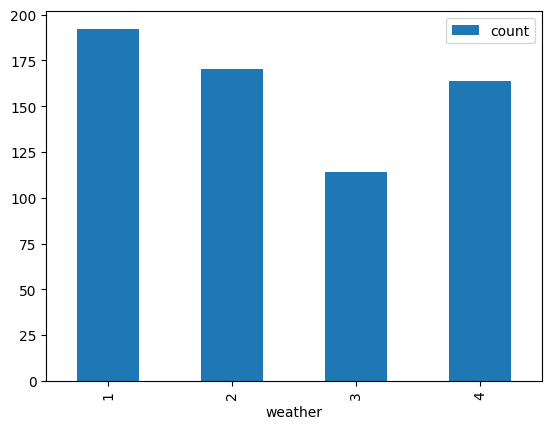

In [78]:
# Bar chart -- showing mean for each season

final_yulu_df[['weather','count']].groupby('weather').mean().plot(kind='bar')
plt.show()

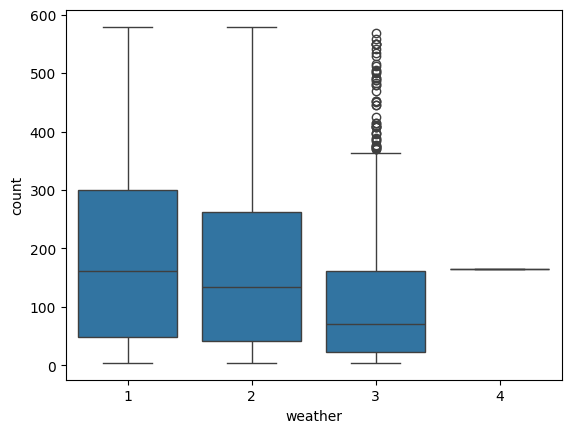

In [79]:
# boxplot for each season group

sns.boxplot(x='weather',y='count',data=final_yulu_df)
plt.show()

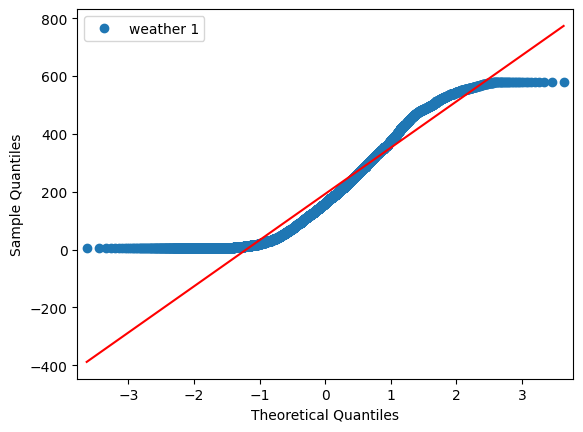

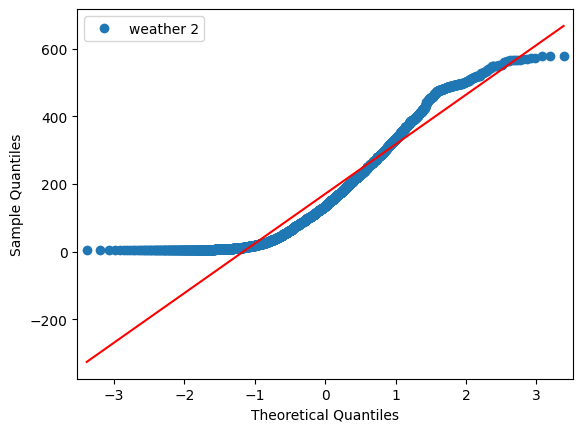

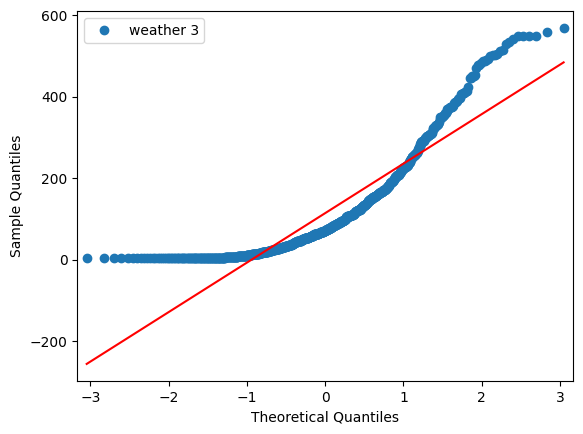

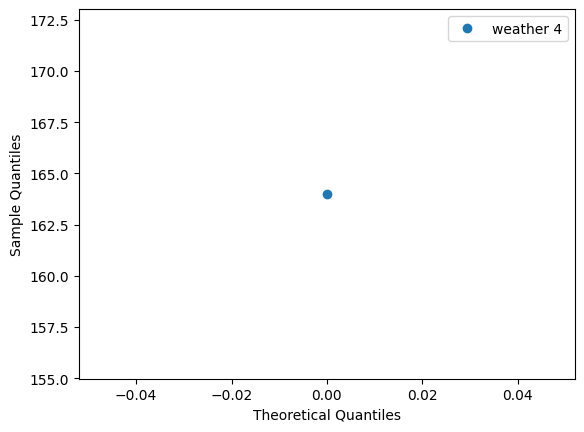

In [80]:
# qqplot for each season's count

for x in final_yulu_df['weather'].unique():
  weather_data = final_yulu_df[final_yulu_df['weather'] == x]['count']
  qqplot(weather_data,line='s',label="weather "+str(x))
  plt.legend()
  plt.show()

In [81]:
# shapiro wilk test for each waether's count

shapiro_result=[]

# weather - 1,2,3 --> as 4 has only one record, shapiro test is not applicable. So, considering 1,2 and 3.

for w in [1,2,3]:
  w_data = final_yulu_df[final_yulu_df['weather'] == w]['count']
  statistic, p_value = shapiro(w_data)
  if p_value < 0.05:
    Normality_result = "Not a Normal Distribution"
  else:
    Normality_result = "Normal Distribution"

  shapiro_result.append((w, statistic, p_value,Normality_result))

shapiro_result_df = pd.DataFrame(shapiro_result, columns=['Weather', 'Statistic', 'P-Value','Normality_result'])

shapiro_result_df


Weather  Statistic       P-Value           Normality_result
0        1   0.917104  1.408061e-52  Not a Normal Distribution
1        2   0.907682  2.015991e-38  Not a Normal Distribution
2        3   0.817818  4.433761e-30  Not a Normal Distribution

##### **Groups Hypothesis Testing:**

**The Kruskal-Wallis test:**

**We could see that distribution of count across each weather groups is not a Normal Distribution. Since we are using "The Kruskal-Wallis test" to check the difference in the distribution/median of the count across the weather groups.**

---
Hypothesis:


*   **Null Hypothesis:** There is no significant difference in the distribution/median of the count across the weather groups.
*   **Alternate Hypothesis:** There is a significant difference in the distribution/median of the count across at least one of the weather groups.



In [82]:
# kruskal-wallis test -- for each weather groups' count--


# Extract the count values for each weathers group

weather_1 = final_yulu_df[final_yulu_df['weather'] == 1]['count']
weather_2 = final_yulu_df[final_yulu_df['weather'] == 2]['count']
weather_3 = final_yulu_df[final_yulu_df['weather'] == 3]['count']
weather_4 = final_yulu_df[final_yulu_df['weather'] == 4]['count']

# performing test
statistic, p_value = kruskal(weather_1,weather_2,weather_3,weather_4)

print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

# conclusion

if p_value < 0.05:
  print("There is a significant difference in the distribution/median of the count across at least one of the weather groups.")
else:
  print("There is no significant difference in the distribution/median of the count across the weather groups.")



Kruskal-Wallis Statistic: 204.64593762707128
P-value: 4.180687757087008e-44
There is a significant difference in the distribution/median of the count across at least one of the weather groups.




---





*   **Mann-Whitney U test for each pair of weathers:**

--> To determine which specific weathers differ significantly, conduct pairwise comparisons using the Mann-Whitney U test.
**This will help identify which weathers have significantly different demand levels.**



In [83]:
import scipy.stats as stats

weathers = [1, 2, 3, 4]
df = final_yulu_df
mannwhitneyu_results = []

# Perform Mann-Whitney U test for each pair of seasons
# Assuming your DataFrame is named 'df'
# Perform pairwise comparisons using Mann-Whitney U test
for i in range(len(weathers)):
    for j in range(i+1, len(weathers)):
        weather1 = df[df['weather'] == weathers[i]]['count']
        weather2 = df[df['weather'] == weathers[j]]['count']
        u_statistic, p_value = stats.mannwhitneyu(weather1, weather2)

        # conclusion for each season1 and season2
        if p_value < 0.05:
          # result = f"There is a significant difference in the distribution/median of the count between the season groups {season1} and {season2}."
          result = f"significant difference in the median of the count between the season groups {weathers[i]} and {weathers[j]}."
        else:
          result = f"NO significant difference in the median of the count between the season groups {weather1} and {weather2}."

        mannwhitneyu_results.append((weathers[i], weathers[j], u_statistic, p_value,result))

# Create a DataFrame to store the results
mannwhitneyu_results_df = pd.DataFrame(mannwhitneyu_results, columns=['Weather1', 'Weather2', 'U-statistic', 'p-value','result'])

mannwhitneyu_results_df

Weather1  Weather2  U-statistic       p-value  \
0         1         2   10903648.5  4.748750e-08   
1         1         3    3979816.0  1.526219e-43   
2         1         4       3556.5  9.850144e-01   
3         2         3    1497508.0  1.312550e-24   
4         2         4       1241.5  8.306710e-01   
5         3         4        208.0  3.732754e-01   

                                              result  
0  significant difference in the median of the co...  
1  significant difference in the median of the co...  
2  NO significant difference in the median of the...  
3  significant difference in the median of the co...  
4  NO significant difference in the median of the...  
5  NO significant difference in the median of the...

##### **conclusion:**

This suggests that **Weathers - [1,2,3] plays a significant role in the demand for Yulu's electric cycles. Weather4 has no significant role , may be due to having only 1 record.**

### **Categorical vs Categorical:**

In [84]:
cat_cols

['season', 'holiday', 'workingday', 'weather']

#### **Hypothesis Testing:**



*   **chi2_contengency test :**



In [85]:
# function -- perform chi2_contengency test for cat_cols

import scipy.stats as stats

def chi2_contengency_test(df,cols):
  chi2_results = []

  # iterate cat cols and compare two values at a time in sequence
  for i in range(len(cols)):
    for j in range(i+1,len(cols)):

      contingency_table = pd.crosstab(df[cols[i]],df[cols[j]])

      chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

      if p < 0.05:
        result = "There is a significant association between the two variables."
      else:
        result = "There is no significant association between the two variables."

      chi2_results.append((cat_cols[i],cat_cols[j],chi2,p,dof,expected,result))

  return pd.DataFrame(chi2_results,columns=['categorical_1','categorical_2','Chi2','P-value','DOF','Expected','Result'])

In [86]:
# call function

categorical_bivariate_result = chi2_contengency_test(final_yulu_df,cat_cols)

categorical_bivariate_result


categorical_1 categorical_2        Chi2        P-value  DOF  \
0        season       holiday   20.823388   1.145516e-04    3   
1        season    workingday    2.570895   4.626148e-01    3   
2        season       weather   49.158656   1.549925e-07    9   
3       holiday    workingday  679.830361  7.274718e-150    1   
4       holiday       weather    5.406883   1.443154e-01    3   
5    workingday       weather   16.162519   1.050217e-03    3   

                                            Expected  \
0  [[2609.2641925408784, 76.7358074591218], [2654...   
1  [[857.1710453793863, 1828.8289546206136], [872...   
2  [[1774.546389858534, 699.2581297078817, 211.94...   
3  [[3374.751975013779, 7200.248024986221], [99.2...   
4  [[6986.533161859269, 2753.0360095535552, 834.4...   
5  [[2295.150468491641, 904.4016167554657, 274.12...   

                                              Result  
0  There is a significant association between the...  
1  There is no significant association between th...  
2  There is a significant association between the...  
3  There is a significant association between the...  
4  There is no significant association between th...  
5  There is a significant association between the...

#### **Conclusion:**

--> There is **a significant association** between the variables - **season, holiday and weather.**

--> Also, There is **a significant association** between the variables - **workingday, holiday and weather.**

--> There is **NO significant association** between **season and workingday**. They are independent.

### **TimeSeries Analysis:**

 to Analyze how "Count" column data changes over datetime

In [87]:
final_yulu_df.head()

season holiday workingday weather  temp   atemp  humidity  windspeed  \
0      1       0          0       1  9.84  14.395        81        0.0   
1      1       0          0       1  9.02  13.635        80        0.0   
2      1       0          0       1  9.02  13.635        80        0.0   
3      1       0          0       1  9.84  14.395        75        0.0   
4      1       0          0       1  9.84  14.395        75        0.0   

   casual  registered  count  year month hour day       date  
0       3          13     16  2011     1    0   1 2011-01-01  
1       8          32     40  2011     1    1   1 2011-01-01  
2       5          27     32  2011     1    2   1 2011-01-01  
3       3          10     13  2011     1    3   1 2011-01-01  
4       0           4      4  2011     1    4   1 2011-01-01

#### **Yearly Trend Analysis:**

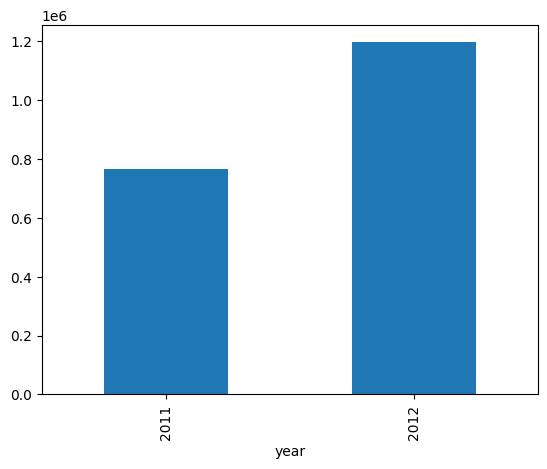

In [97]:
final_yulu_df.groupby('year')['count'].sum().plot(kind='bar')
plt.show()

In [102]:
# find percentage yearly increase

final_yulu_df.groupby('year')['count'].sum().pct_change()*100

year
2011         NaN
2012    55.87184
Name: count, dtype: float64

#### **Monthly Trend Analysis [count by year and month]:**

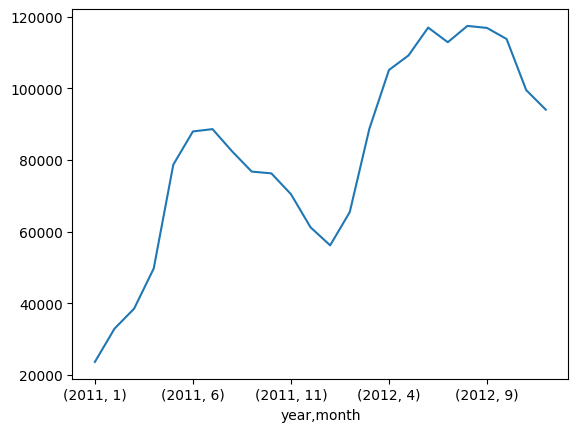

In [90]:
final_yulu_df.groupby(['year','month'])['count'].sum().plot()
plt.show()

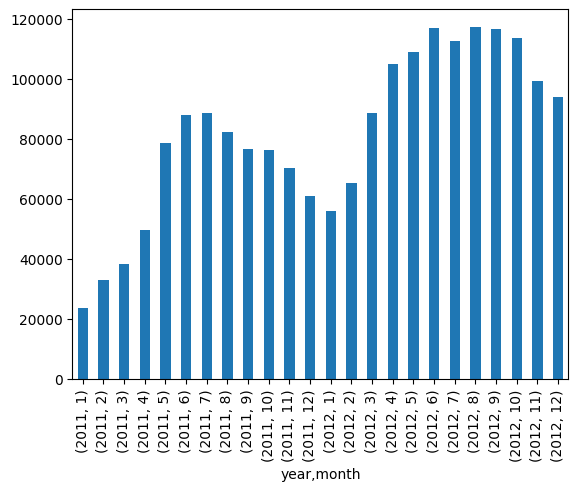

In [96]:
final_yulu_df.groupby(['year','month'])['count'].sum().plot(kind='bar')
plt.show()

In [103]:
# Monthly percentage change

final_yulu_df.groupby(['year','month'])['count'].sum().pct_change()*100

year  month
2011  1              NaN
      2        39.192329
      3        16.931201
      4        29.078640
      5        58.276028
      6        11.763660
      7         0.732010
      8        -7.001726
      9        -6.849398
      10       -0.636959
      11       -7.604677
      12      -13.125523
2012  1        -8.218194
      2        16.514823
      3        35.483132
      4        18.491089
      5         3.884243
      6         7.099817
      7        -3.493711
      8         4.030407
      9        -0.474382
      10       -2.648491
      11      -12.521536
      12       -5.496438
Name: count, dtype: float64

##### **Monthly Trend Analysis [Count by Month]:**

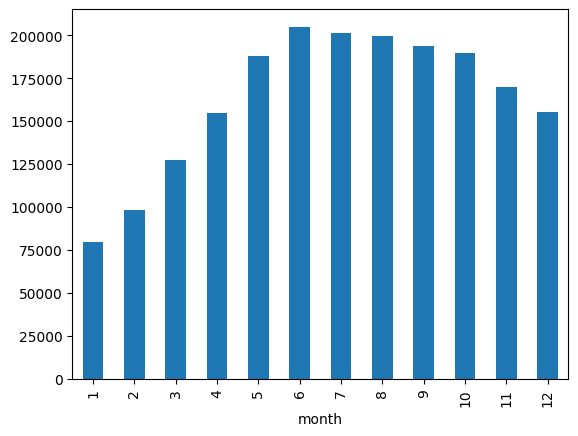

In [93]:
final_yulu_df.groupby('month')['count'].sum().plot(kind='bar')
plt.show()

#### **Daily Trend Analysis [count by date] :**

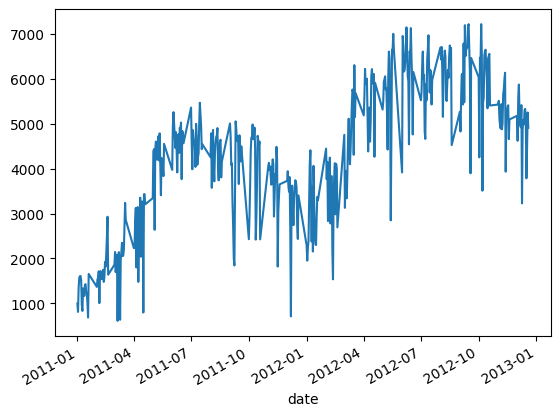

In [89]:
final_yulu_df.groupby('date')['count'].sum().plot()
plt.show()

##### **Daily Trend Analysis [count by dayOfMonth] :**

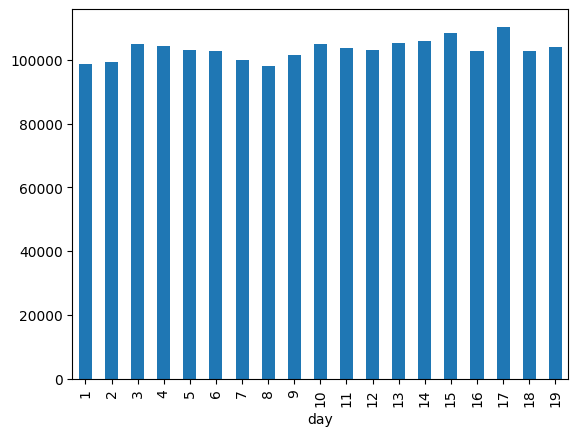

In [95]:
final_yulu_df.groupby('day')['count'].sum().plot(kind='bar')
plt.show()

##### **Hourly Analysis:**

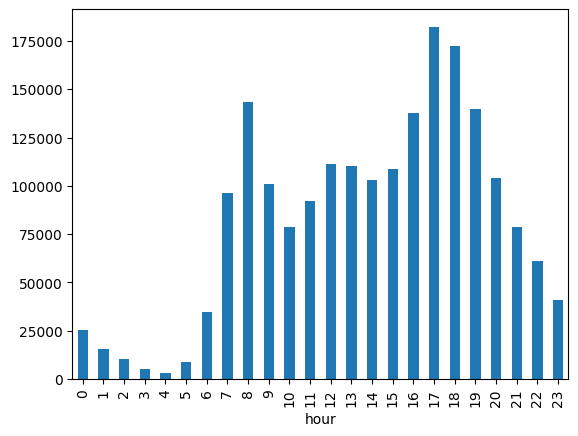

In [98]:
final_yulu_df.groupby('hour')['count'].sum().plot(kind='bar')
plt.show()

#### **Conclusion:**



*   **Yearly -> In year 2012, Count of rides are increased by 55.87% compare to year 2011.**
*   **Monthly trend in count of rides ->**
  * **From Month Feb (2) to June(6), there is upward(Increase) trend.**
  * **From Month July(7) to January(1) , there is Downward(Decrease) trend.**

* **DayofMonth -> There are only 1 to 19 days of each month, rides were done and almost each day of month having not a significant difference as per total rides count per DayofMonth. There is no operation from day 20 to lastday of each month.**




# **Final Key Insights and Recommendation:**


### **Problem Statement**

Yulu has experienced a decline in revenue. This analysis aims to identify the factors influencing demand for shared electric cycles in the Indian market.

### **Key Findings**

**Categorical Variables**

* **Season:** A significant predictor of demand.
* **Holiday:** No significant impact on demand.
* **Workingday:** No significant impact on demand.
* **Weather:** A significant predictor of demand, with favorable weather conditions (clear, low humidity, low windspeed) positively influencing demand.

**Numerical Variables**

* **Temperature:** Positively correlated with demand, indicating higher demand in warmer weather.
* **Humidity:** Negatively correlated with demand, suggesting lower demand in humid conditions.
* **Windspeed:** Negatively correlated with demand, suggesting lower demand in windy conditions.

**Time-Based Trends**

* **Year-over-Year:** A 55.87% increase in demand in 2012 compared to 2011.
* **Month-over-Month:** Upward trend from February to June, downward trend from July to January.
* **Day-of-Month:** No significant differences in demand across days of the month.

#### **Conclusions**

1. **Seasonality:** The demand for Yulu's electric cycles is significantly influenced by the season, with higher demand during warmer months.
2. **Weather Conditions:** Favorable weather conditions (warmer temperatures, lower humidity, lower windspeed) positively impact demand.
3. **Yearly Trend:** The overall demand for electric cycles has been increasing over time, especially in 2012.
4. **Day-of-Month Consistency:** There is no significant difference in demand across different days of the month, suggesting a relatively consistent daily usage pattern.

### **Recommendations:**

* **Seasonal Marketing:** Tailor marketing campaigns and promotions to target peak demand seasons.
* **Weather-Based Pricing:** Implement dynamic pricing strategies that adjust prices based on weather conditions.
* **Infrastructure Expansion:** Focus on expanding services in regions with favorable weather conditions and invest in infrastructure to support increased demand.
* **Long-Term Planning:** Continue monitoring demand trends and adjust strategies accordingly to sustain growth.
